# **PROYECT: Term Deposit Marketing**

**INTRODUCTION**

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

**Data Description**:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

**Attributes**:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

Download Data:

https://drive.google.com/file/d/1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7

Goal(s):

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

Success Metric(s):

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

Current Challenges:

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.

In [1]:
# Montar Google Drive
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Ruta correcta al archivo CSV en Google Drive
path_dbset = '/content/gdrive/MyDrive/Proyectos APZIVA/Term Deposit_Proy 2/term-deposit-marketing-2020.csv'

# Leer el archivo CSV usando pd.read_csv()
db = pd.read_csv(path_dbset)

# **1. VISUALIZATION AND MISSING VALUE TREATMENT**

In [4]:
# verify information of the dataset
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
# Rows and columns information. resultSet(rows, columns)
db.shape

(40000, 14)

In [6]:
db.describe()

age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000

In [7]:
import numpy as np

# Replace missing value representations with NaN
db.replace(["?", "N/A", "NA", "null", ""], np.nan, inplace=True)

# Check for missing values (NaN) in absolute count
print("\nMissing values (NaN) per column (absolute count):")
print(db.isnull().sum())

# Check for missing values (NaN) as a percentage
print("\nMissing values (NaN) per column (percentage):")
print((db.isnull().sum() / len(db)) * 100)


Missing values (NaN) per column (absolute count):
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

Missing values (NaN) per column (percentage):
age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
y            0.0
dtype: float64


# **2. PREPROCESSING**

## **Feature Encoding**

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Create instances of the encoders
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False)  # Use sparse_output=False to get a dense array

# Define the columns to encode with LabelEncoder --> Categorical variables with two values (such as y:subscribed or not subscribed)
LE_categor_columns = ['default', 'housing', 'loan', 'y']

# Apply Label Encoding and create new columns
for column in LE_categor_columns:
    # Create the name for the new encoded column
    LE_column = column + '_LE'

    # Assign the transformation to the new column
    db[LE_column] = le.fit_transform(db[column])

# Define the columns to encode with OneHotEncoder --> Categorical variables with multiple values (such as 'type of job', ranging from 1 to 11)
OHE_categor_columns = ['job', 'marital', 'education', 'contact', 'month']

# Apply OneHot Encoding and add the new columns to the DataFrame
for column in OHE_categor_columns:
    # Create a base name for the new encoded columns
    OHE_column_prefix = column + '_OHE'

    # Apply OneHotEncoder
    encoded_array = ohe.fit_transform(db[[column]])  # Double brackets needed to pass as DataFrame

    # Get the categories directly from the OneHotEncoder
    categories = ohe.categories_[0]  # ohe.categories_ returns a list of arrays

    # Convert the array to a DataFrame with the correct column names
    ohe_df = pd.DataFrame(encoded_array, columns=[f"{OHE_column_prefix}_{category}" for category in categories])

    # Concatenate the new columns with the original DataFrame
    db = pd.concat([db, ohe_df], axis=1)

# Display the first few rows of the DataFrame with the new encoded columns
print(db.head(5))


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... month_OHE_aug  month_OHE_dec  month_OHE_feb  \
0  unknown    5  ...           0.0            0.0            0.0   
1  unknown    5  ...           0.0            0.0            0.0   
2  unknown    5  ...           0.0            0.0            0.0   
3  unknown    5  ...           0.0            0.0            0.0   
4  unknown    5  ...           0.0            0.0            0.0   

  month_OHE_jan  month_OHE_jul  month_OHE_jun  month_OHE_mar  month_OHE_may  \
0           0.0            0.0            0.0            0.0       

In [9]:
db.describe()


age        balance           day      duration      campaign  \
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000   
mean      40.544600    1274.277550     16.017225    254.824300      2.882175   
std        9.641776    2903.769716      8.278127    259.366498      3.239051   
min       19.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      54.000000      8.000000    100.000000      1.000000   
50%       39.000000     407.000000     17.000000    175.000000      2.000000   
75%       48.000000    1319.000000     21.000000    313.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

         default_LE    housing_LE       loan_LE          y_LE  job_OHE_admin  \
count  40000.000000  40000.000000  40000.000000  40000.000000   40000.000000   
mean       0.020225      0.600775      0.173250      0.072400       0.112075   
std        0.140771      0.489745      0.378468      0.259152       0.315463   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       0.000000   
50%        0.000000      1.000000      0.000000      0.000000       0.000000   
75%        0.000000      1.000000      0.000000      0.000000       0.000000   
max        1.000000      1.000000      1.000000      1.000000       1.000000   

       ...  month_OHE_aug  month_OHE_dec  month_OHE_feb  month_OHE_jan  \
count  ...   40000.000000   40000.000000   40000.000000   40000.000000   
mean   ...       0.130375       0.000325       0.057400       0.029400   
std    ...       0.336720       0.018025       0.232608       0.168927   
min    ...       0.000000       0.000000       0.000000       0.000000   
25%    ...       0.000000       0.000000       0.000000       0.000000   
50%    ...       0.000000       0.000000       0.000000       0.000000   
75%    ...       0.000000       0.000000       0.000000       0.000000   
max    ...       1.000000       1.000000       1.000000       1.000000   

       month_OHE_jul  month_OHE_jun  month_OHE_mar  month_OHE_may  \
count   40000.000000   40000.000000   40000.000000   40000.000000   
mean        0.159500       0.118350       0.006450       0.338300   
std         0.366146       0.323026       0.080053       0.473137   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

       month_OHE_nov  month_OHE_oct  
count   40000.000000   40000.000000  
mean        0.089950       0.002000  
std         0.286114       0.044677  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000  

[8 rows x 42 columns]

In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      40000 non-null  int64  
 1   job                      40000 non-null  object 
 2   marital                  40000 non-null  object 
 3   education                40000 non-null  object 
 4   default                  40000 non-null  object 
 5   balance                  40000 non-null  int64  
 6   housing                  40000 non-null  object 
 7   loan                     40000 non-null  object 
 8   contact                  40000 non-null  object 
 9   day                      40000 non-null  int64  
 10  month                    40000 non-null  object 
 11  duration                 40000 non-null  int64  
 12  campaign                 40000 non-null  int64  
 13  y                        40000 non-null  object 
 14  default_LE            

## **Feature Scaling**

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import pandas as pd

# 1. Aplicar MinMaxScaler a 'day'
scaler_minmax = MinMaxScaler()
day_norm = scaler_minmax.fit_transform(db[['day']])

# 2. Aplicar StandardScaler a 'age'
scaler_standard = StandardScaler()
age_std = scaler_standard.fit_transform(db[['age']])

# 3. Aplicar RobustScaler a 'balance', 'duration' y 'campaign'
scaler_robust = RobustScaler()
robust_scaled = scaler_robust.fit_transform(db[['balance', 'duration', 'campaign']])

# Separar los resultados de RobustScaler
balance_robust = robust_scaled[:, 0]
duration_robust = robust_scaled[:, 1]
campaign_robust = robust_scaled[:, 2]

# Agregar las columnas escaladas al DataFrame original
db['day_norm'] = day_norm
db['age_std'] = age_std
db['balance_robust'] = balance_robust
db['duration_robust'] = duration_robust
db['campaign_robust'] = campaign_robust

# Mostrar la forma de las variables
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import pandas as pd

# Supongamos que `db` ya está definido como un DataFrame

# 1. Aplicar MinMaxScaler a 'day'
scaler_minmax = MinMaxScaler()
day_norm = scaler_minmax.fit_transform(db[['day']])

# 2. Aplicar StandardScaler a 'age'
scaler_standard = StandardScaler()
age_std = scaler_standard.fit_transform(db[['age']])

# 3. Aplicar RobustScaler a 'balance', 'duration' y 'campaign'
scaler_robust = RobustScaler()
robust_scaled = scaler_robust.fit_transform(db[['balance', 'duration', 'campaign']])

# Separar los resultados de RobustScaler
balance_robust = robust_scaled[:, 0]
duration_robust = robust_scaled[:, 1]
campaign_robust = robust_scaled[:, 2]

# Agregar las columnas escaladas al DataFrame original
db['day_norm'] = day_norm
db['age_std'] = age_std
db['balance_robust'] = balance_robust
db['duration_robust'] = duration_robust
db['campaign_robust'] = campaign_robust

# Mostrar las primeras filas para verificar
print(db.head())
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import pandas as pd

# `db` ya está definido como un DataFrame

# 1. Aplicar MinMaxScaler a 'day'
scaler_minmax = MinMaxScaler()
day_norm = scaler_minmax.fit_transform(db[['day']])

# 2. Aplicar StandardScaler a 'age'
scaler_standard = StandardScaler()
age_std = scaler_standard.fit_transform(db[['age']])

# 3. Aplicar RobustScaler a 'balance', 'duration' y 'campaign'
scaler_robust = RobustScaler()
robust_scaled = scaler_robust.fit_transform(db[['balance', 'duration', 'campaign']])

# Separar los resultados de RobustScaler
balance_robust = robust_scaled[:, 0]
duration_robust = robust_scaled[:, 1]
campaign_robust = robust_scaled[:, 2]

# Agregar las columnas escaladas al DataFrame original
db['day_norm'] = day_norm
db['age_std'] = age_std
db['balance_robust'] = balance_robust
db['duration_robust'] = duration_robust
db['campaign_robust'] = campaign_robust

# Mostrar las primeras filas para verificar
print(db.head())
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import pandas as pd

# Supongamos que `db` ya está definido como un DataFrame

# 1. Aplicar MinMaxScaler a 'day'
scaler_minmax = MinMaxScaler()
day_norm = scaler_minmax.fit_transform(db[['day']])

# 2. Aplicar StandardScaler a 'age'
scaler_standard = StandardScaler()
age_std = scaler_standard.fit_transform(db[['age']])

# 3. Aplicar RobustScaler a 'balance', 'duration' y 'campaign'
scaler_robust = RobustScaler()
robust_scaled = scaler_robust.fit_transform(db[['balance', 'duration', 'campaign']])

# Separar los resultados de la matriz robust_scaled. Cuando las separa de la matriz (4000,3)
# donde 3 significa tres columnas (0:'balance', 1:'duration', 2:'campaign') las devuelve como arrays unidimensionales,
# es decir como un arreglo de números planos (4000,)
balance_robust = robust_scaled[:, 0]
duration_robust = robust_scaled[:, 1]
campaign_robust = robust_scaled[:, 2]

# con pd.dataframe convertimos en matriz a los 3 arrays planos,
#o columna en dos dimensiones (n_samples, 1_feature) por ejemplo (4000, balance_robust)
# Convertir cada resultado de RobustScaler en DataFrames explícitos para mantener la forma (40000, 1)
balance_robust = pd.DataFrame(robust_scaled[:, 0], columns=['balance_robust']) # [:, 0] es el array correspondiente a la primer columna de la matriz robust_scaled
#Los corchetes ['balance_robust'] indican que estamos pasando una lista con un único elemento, que se usa como el nombre de la columna del DataFrame resultante.
duration_robust = pd.DataFrame(robust_scaled[:, 1], columns=['duration_robust'])
campaign_robust = pd.DataFrame(robust_scaled[:, 2], columns=['campaign_robust'])

# Agregar las columnas escaladas al DataFrame original
db['day_norm'] = day_norm
db['age_std'] = age_std
db['balance_robust'] = balance_robust.values
db['duration_robust'] = duration_robust.values
db['campaign_robust'] = campaign_robust.values

# Mostrar las primeras filas para verificar
print(db.head())
# Imprimir el shape de todas las columnas escaladas
print("Shape de day_norm:", day_norm.shape)
print("Shape de age_std:", age_std.shape)
print("Shape de balance_robust:", balance_robust.shape)
print("Shape de duration_robust:", duration_robust.shape)
print("Shape de campaign_robust:", campaign_robust.shape)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day  ... month_OHE_jun  month_OHE_mar  month_OHE_may  \
0  unknown    5  ...           0.0            0.0            1.0   
1  unknown    5  ...           0.0            0.0            1.0   
2  unknown    5  ...           0.0            0.0            1.0   
3  unknown    5  ...           0.0            0.0            1.0   
4  unknown    5  ...           0.0            0.0            1.0   

  month_OHE_nov  month_OHE_oct  day_norm   age_std  balance_robust  \
0           0.0            0.0  0.133333  1.810415        1.372332   
1     

In [12]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      40000 non-null  int64  
 1   job                      40000 non-null  object 
 2   marital                  40000 non-null  object 
 3   education                40000 non-null  object 
 4   default                  40000 non-null  object 
 5   balance                  40000 non-null  int64  
 6   housing                  40000 non-null  object 
 7   loan                     40000 non-null  object 
 8   contact                  40000 non-null  object 
 9   day                      40000 non-null  int64  
 10  month                    40000 non-null  object 
 11  duration                 40000 non-null  int64  
 12  campaign                 40000 non-null  int64  
 13  y                        40000 non-null  object 
 14  default_LE            

## **Upsamping/Downsampling** ##

## Synthetic Minority Over-sampling Technique (SMOTE)

In [13]:
# Data after preprocessing (encoding and scaling)
X_before_SMOTE = db[['default_LE', 'housing_LE', 'loan_LE', 'job_OHE_admin', 'job_OHE_blue-collar', 'job_OHE_entrepreneur',
                     'job_OHE_housemaid', 'job_OHE_management', 'job_OHE_retired', 'job_OHE_self-employed',
                     'job_OHE_services', 'job_OHE_student', 'job_OHE_technician', 'job_OHE_unemployed', 'job_OHE_unknown',
                     'marital_OHE_divorced', 'marital_OHE_married', 'marital_OHE_single', 'education_OHE_primary',
                     'education_OHE_secondary', 'education_OHE_tertiary', 'education_OHE_unknown', 'contact_OHE_cellular',
                     'contact_OHE_telephone', 'contact_OHE_unknown', 'month_OHE_apr', 'month_OHE_aug', 'month_OHE_dec',
                     'month_OHE_feb', 'month_OHE_jan', 'month_OHE_jul', 'month_OHE_jun', 'month_OHE_mar', 'month_OHE_may',
                     'month_OHE_nov', 'month_OHE_oct', 'day_norm', 'age_std', 'balance_robust', 'duration_robust',
                     'campaign_robust']]
y = db['y_LE']

# Apply SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_before_SMOTE, y)

# Definir variables para un modelo específico
# Por ejemplo, seleccionando un subconjunto de variables
# REACTIVAR EL CODIGO DE ABAJO PARA USAR EN LOS ALGORITMOS
# X_model1 = X_smote[['default_LE', 'housing_LE', 'loan_LE', 'job_OHE_admin', 'job_OHE_blue-collar']]
# X_model2 = X_smote[['age_std', 'balance_robust', 'duration_robust', 'campaign_robust']]

**CONCEPTS OF USING TEST GROUP IN DIFFERENT ALGORISTMS**

When training a model with X_smote_train and y_smote_train, where several samples with y=1 are synthetic, does this mean that when we make predictions on X_smote_test, there is a higher probability that the prediction will match the actual (synthetic) value because the model was also trained on synthetic values?

Yes, this is correct. Training the model on X_smote_train and y_smote_train, which include synthetic samples generated by SMOTE for the minority class, allows the model to learn patterns that are partially influenced by these synthetic samples. As a result, when evaluating the model on X_smote_test, which also contains synthetic data (though different from those in the training set), the model is more likely to predict these observations correctly, as they were generated in a similar manner to those used during training.

**RECOMMENDATION**

--> Use X_smote_train to train the model and improve its ability to handle imbalanced data.

--> Use X_before_SMOTE_test to evaluate the model and obtain metrics that are more representative of real-world performance.

This approach allows for a more accurate measurement of how the model will perform in real-world scenarios, where classes are imbalanced.

Metrics calculated on an artificially balanced test set (X_smote_test) will be overly optimistic because:

The model will have the same proportion of examples for both classes, making its task easier.
Metrics such as accuracy or F1-score may be inflated since the minority class (which is usually harder to predict) will be overrepresented in an unrealistic way.

# **3. EXPLORATORY DATA ANALYSIS**

## **Quick Univariate Analysis**

## Histograms

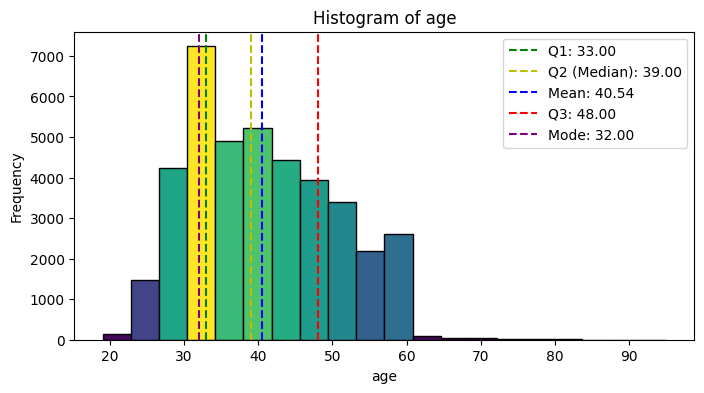

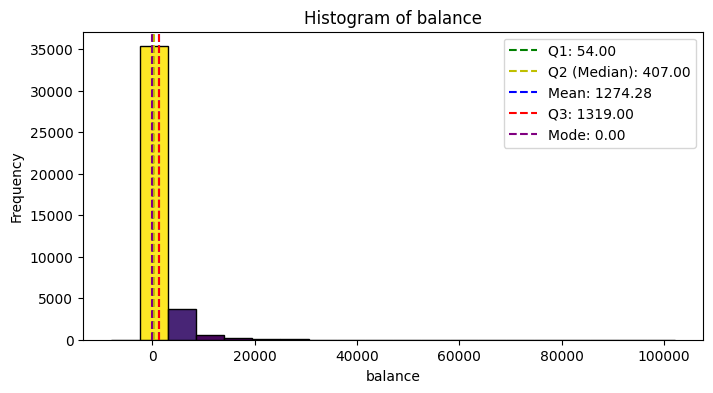

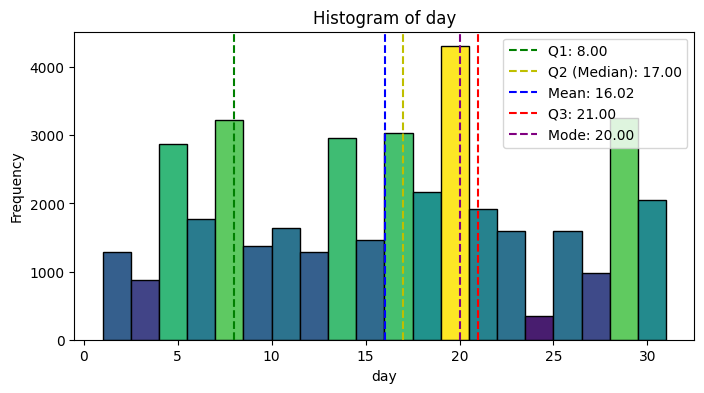

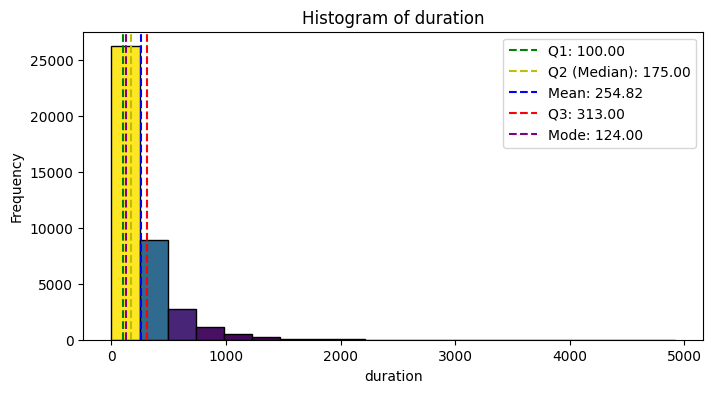

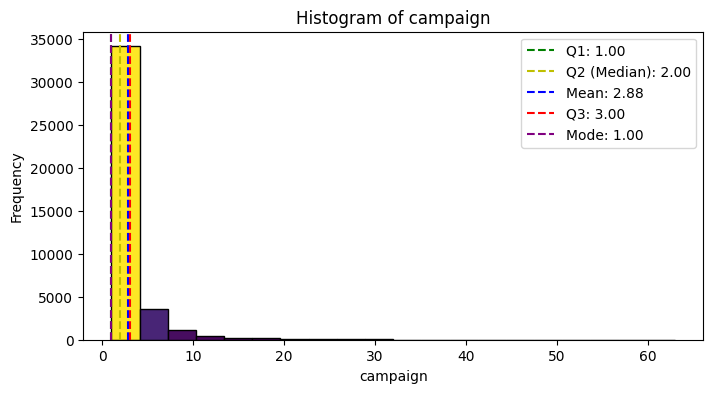

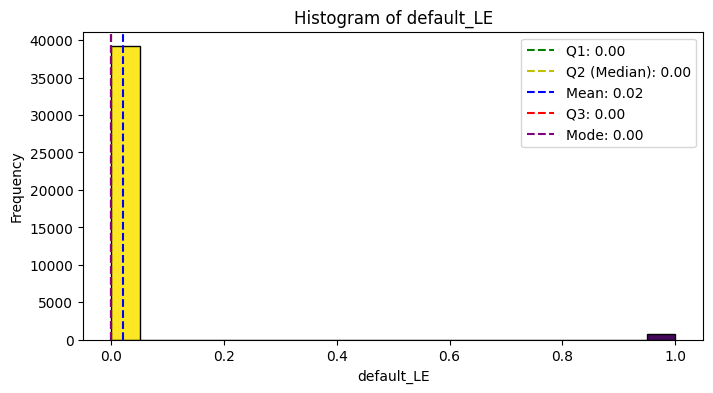

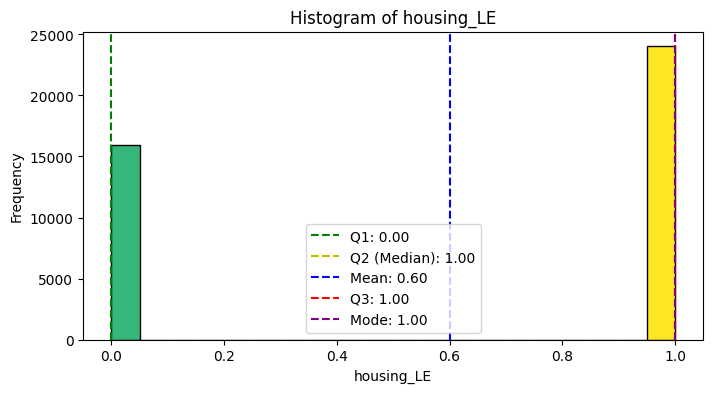

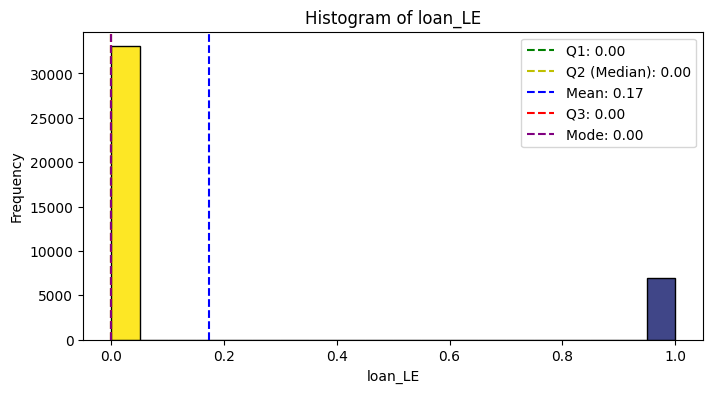

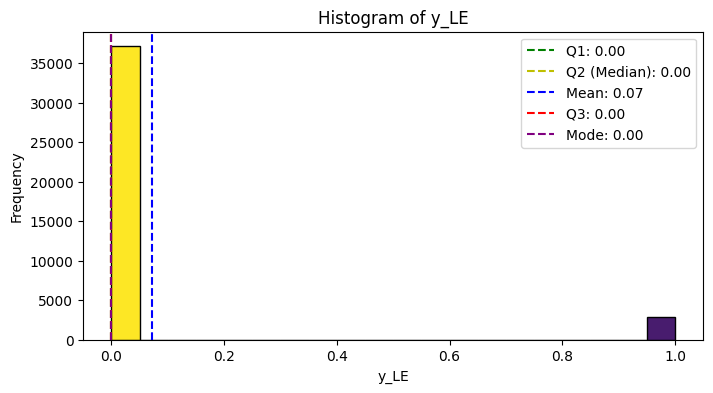

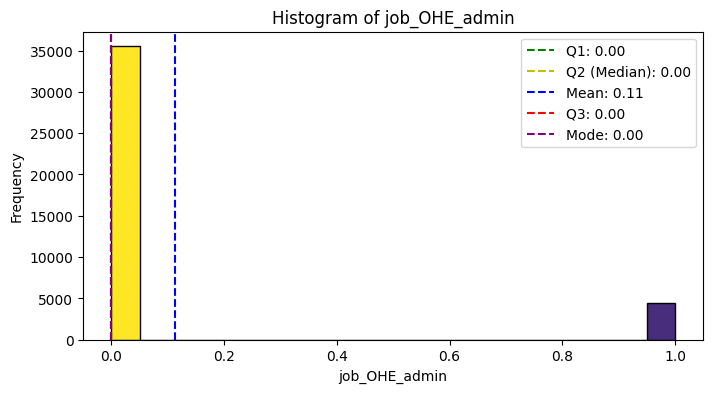

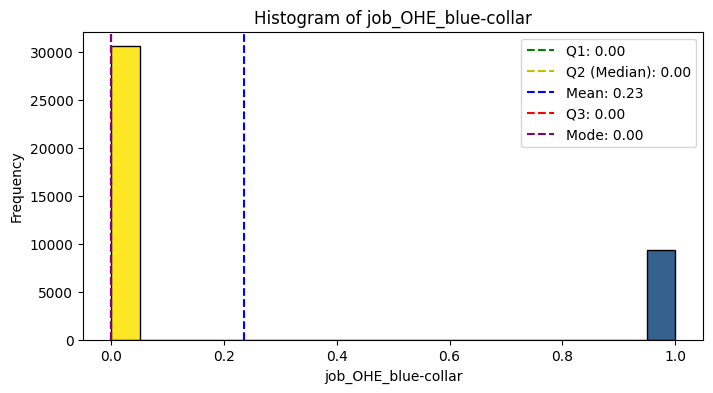

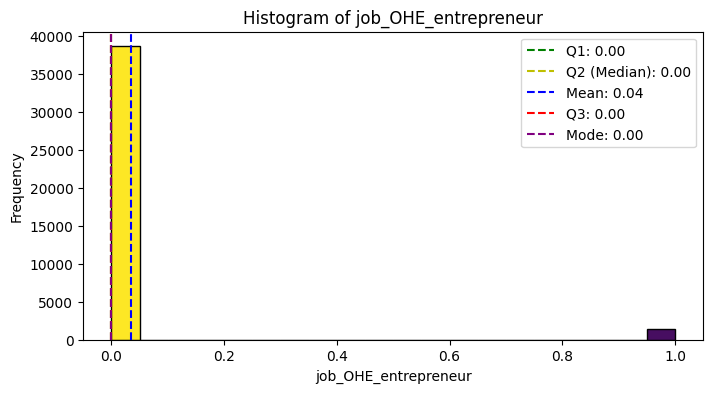

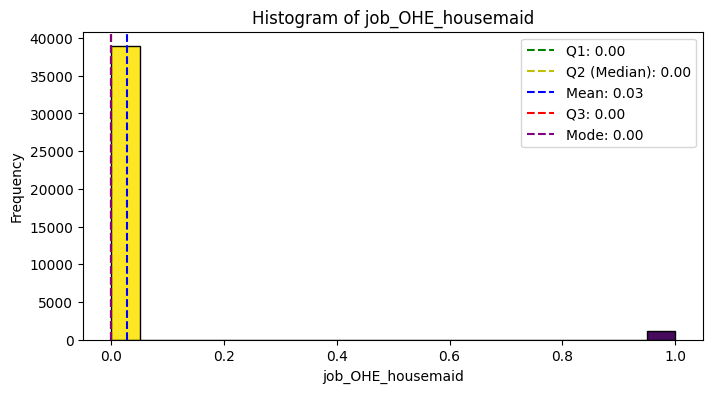

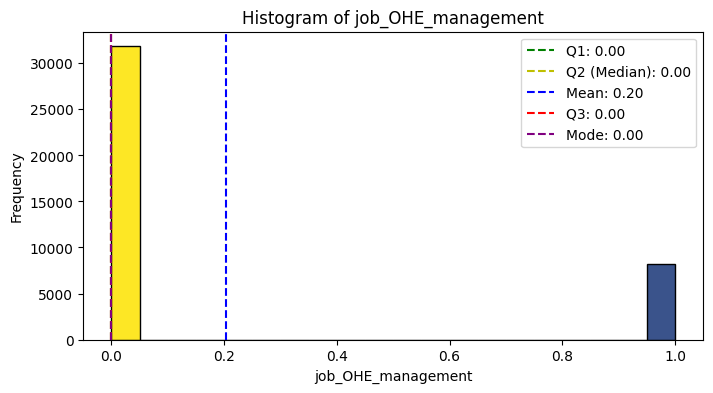

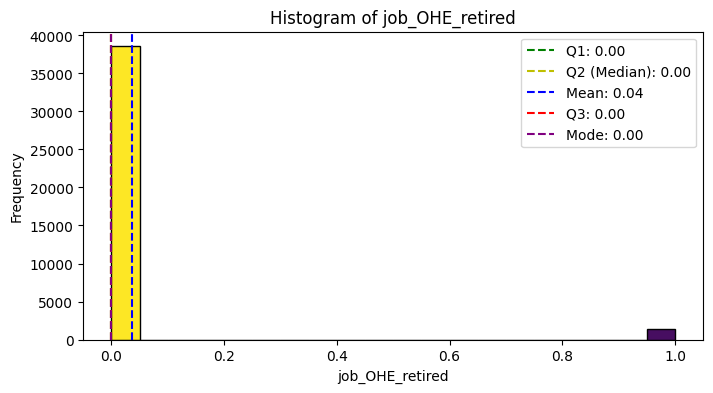

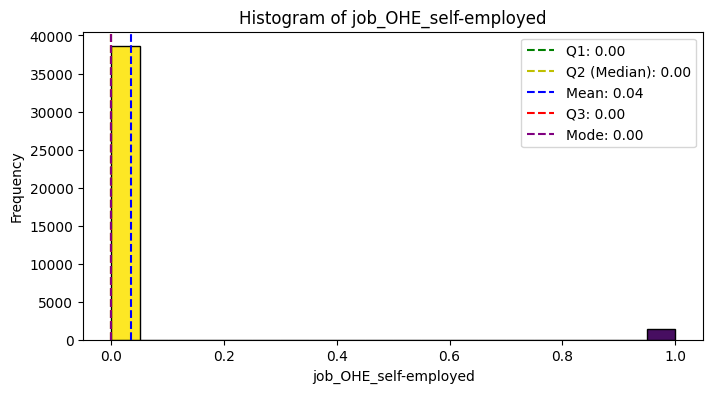

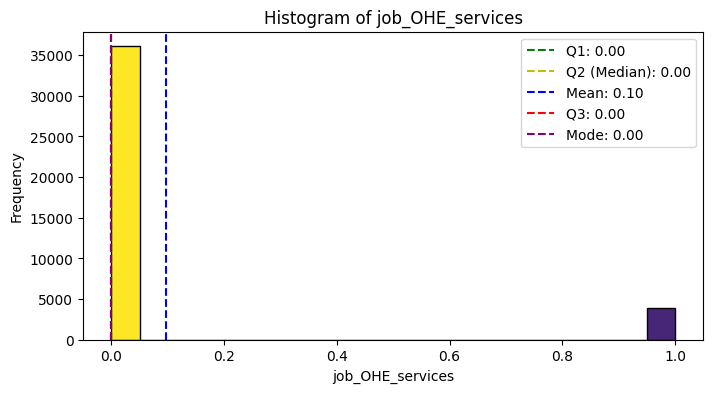

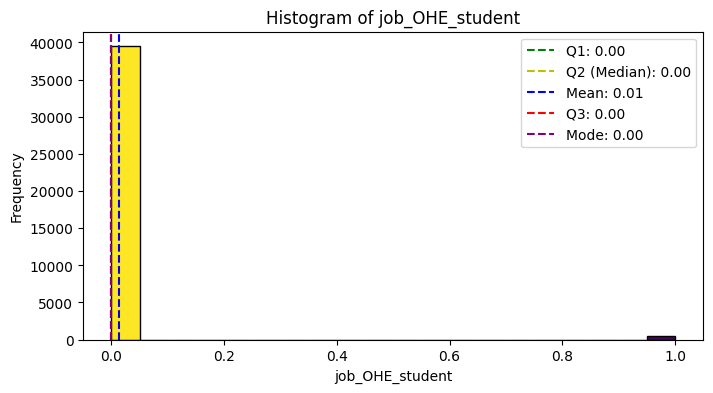

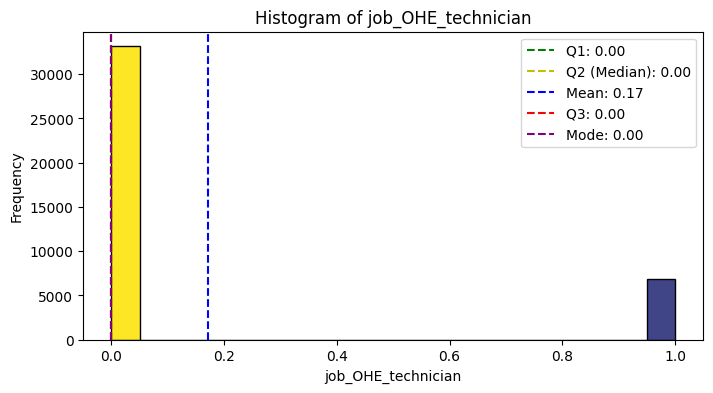

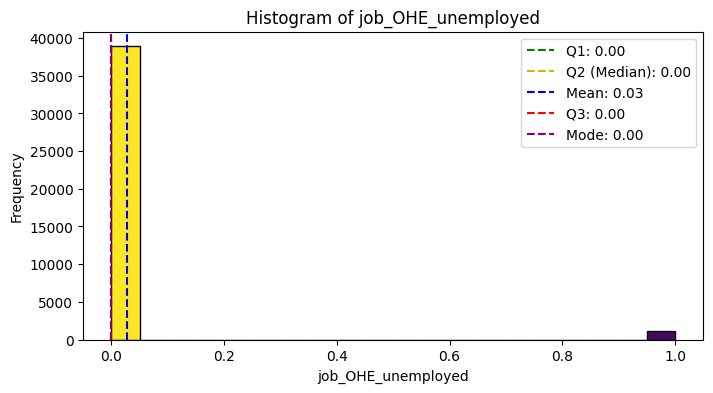

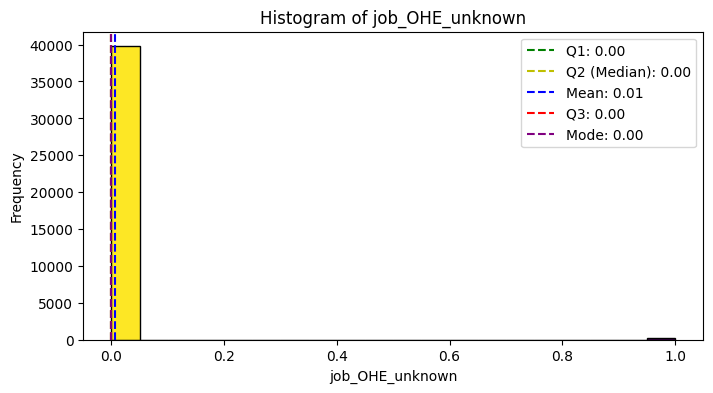

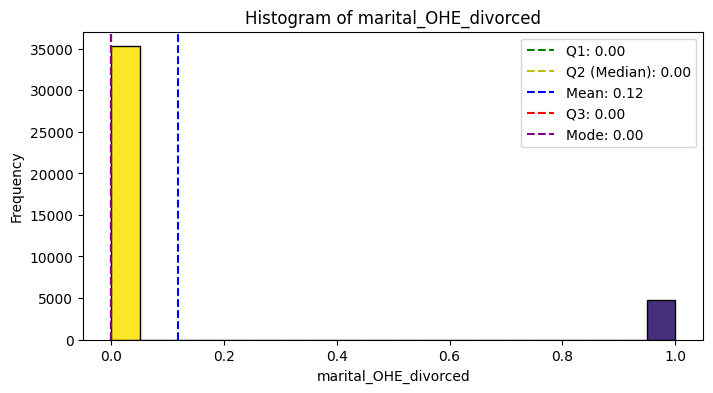

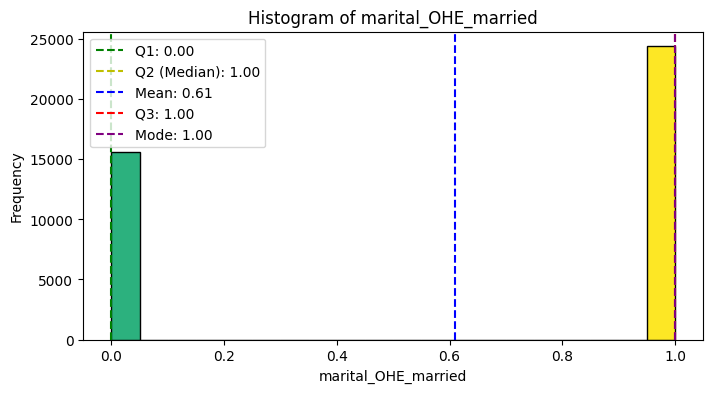

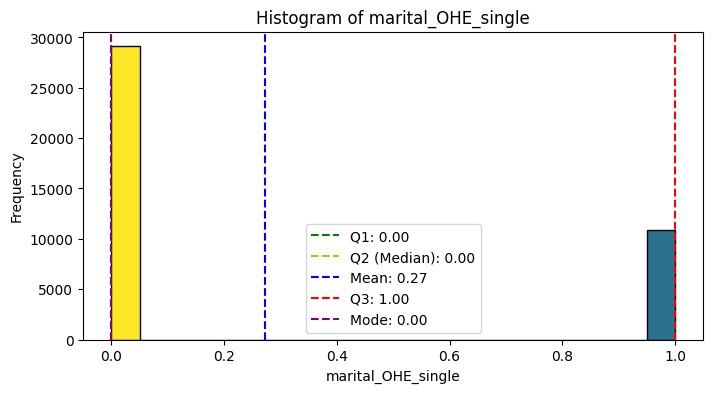

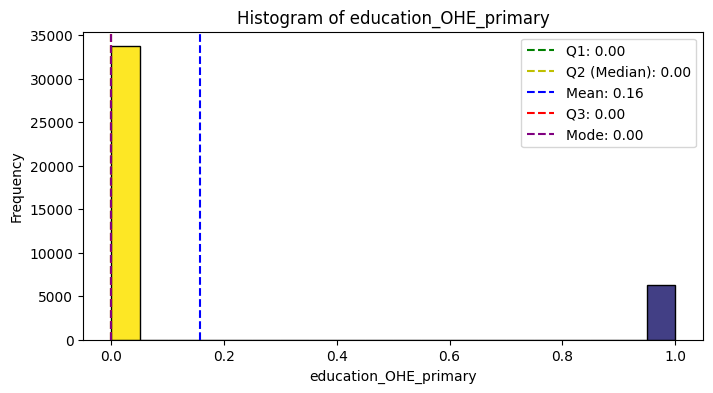

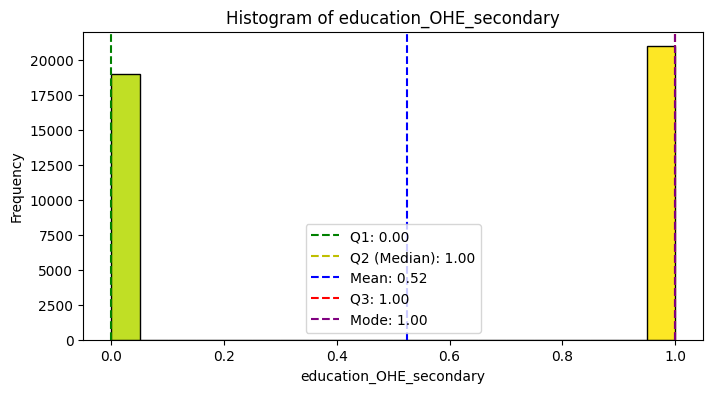

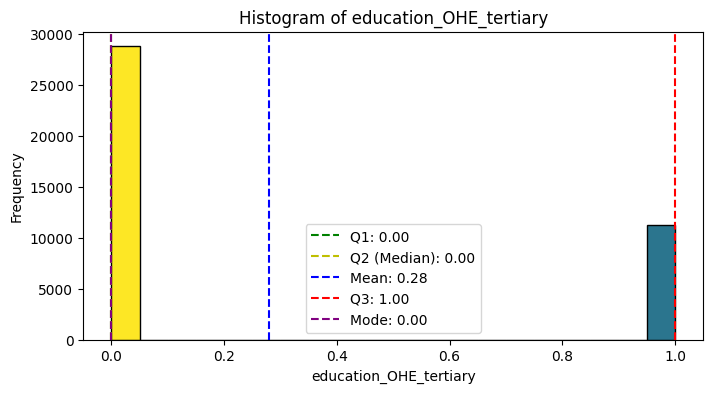

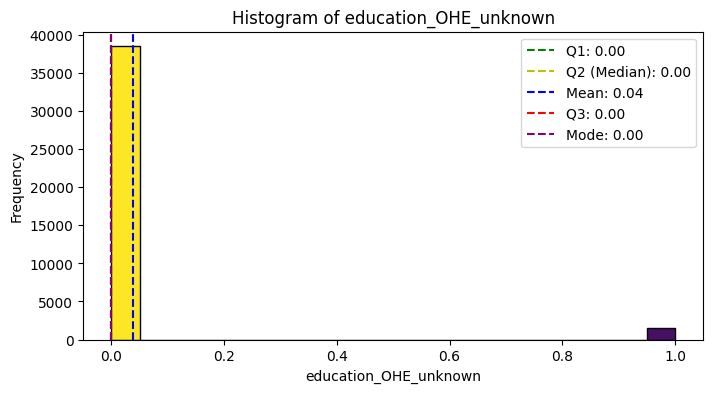

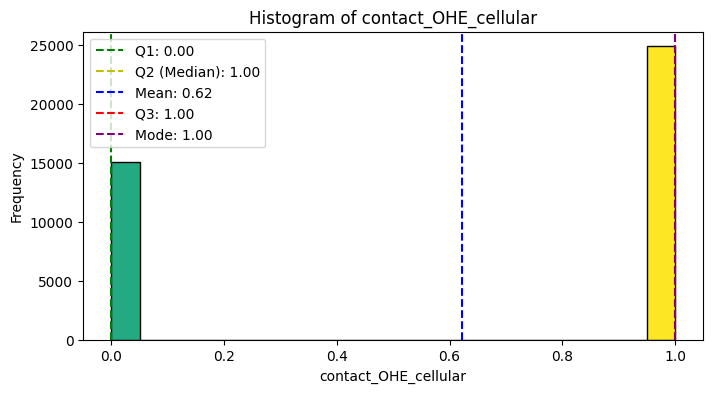

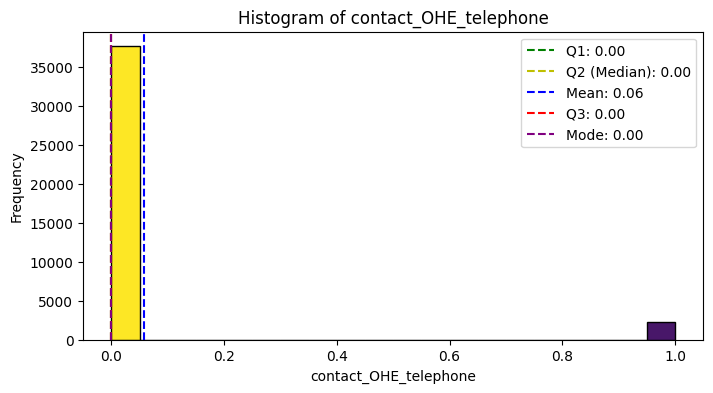

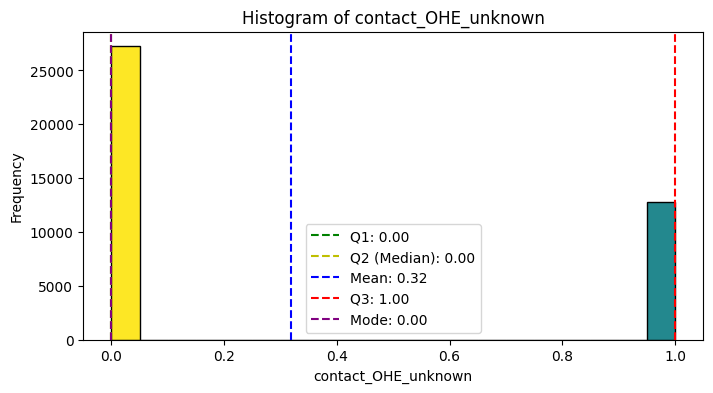

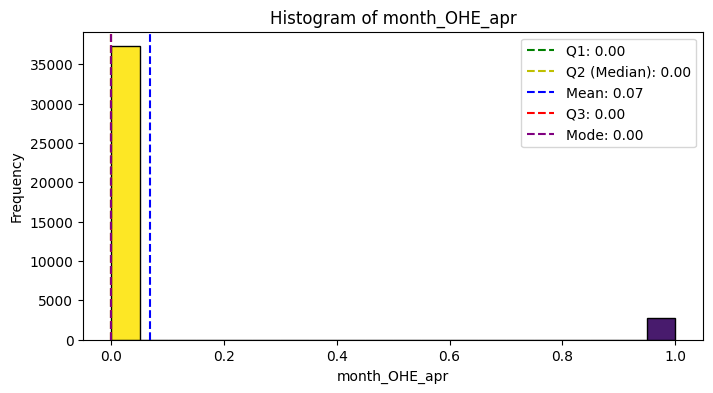

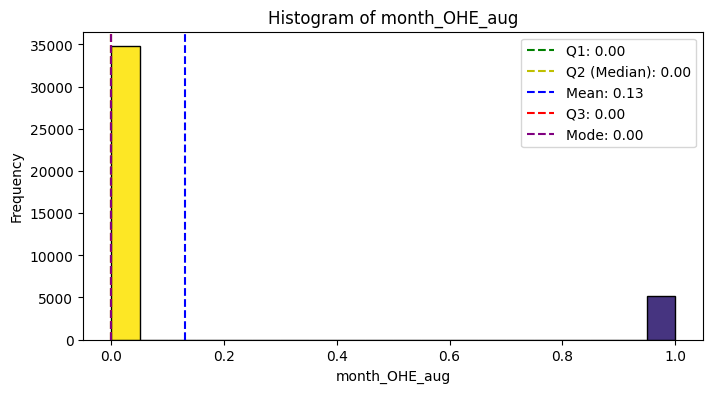

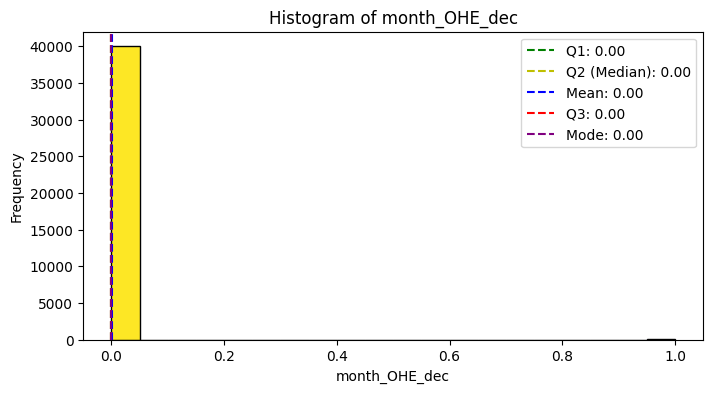

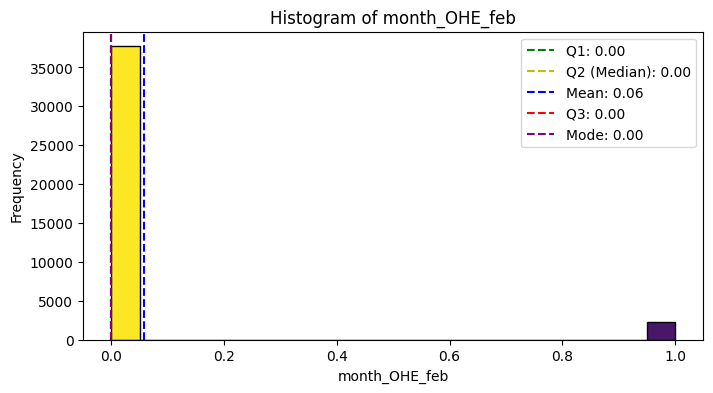

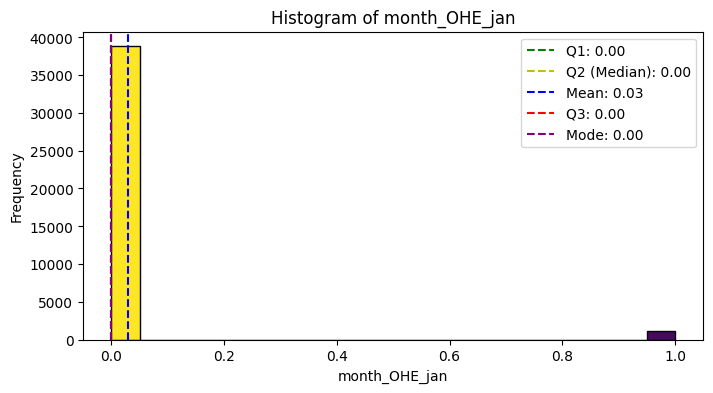

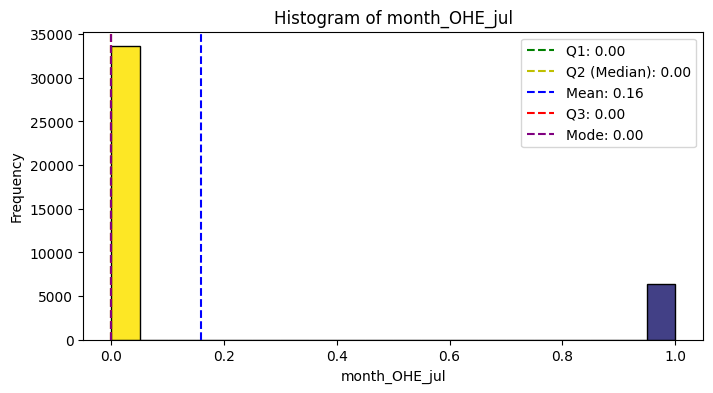

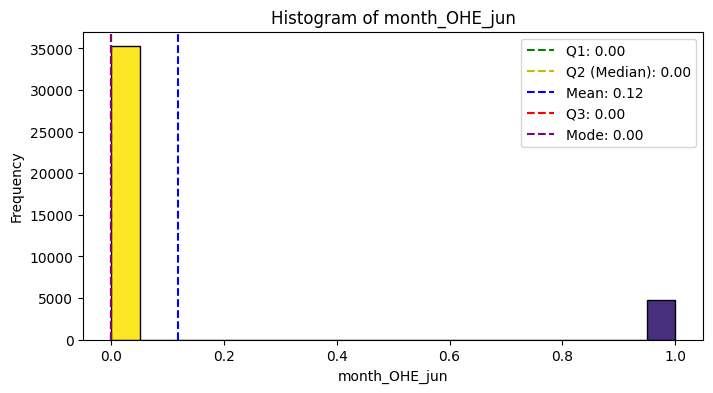

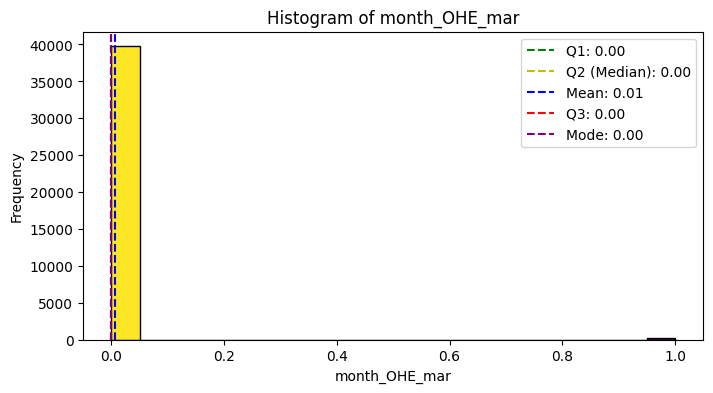

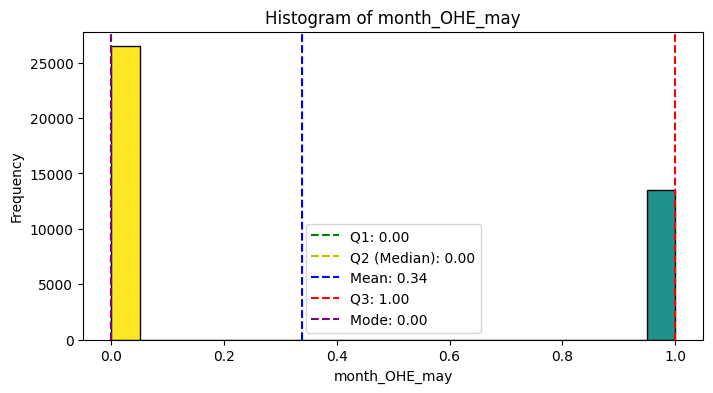

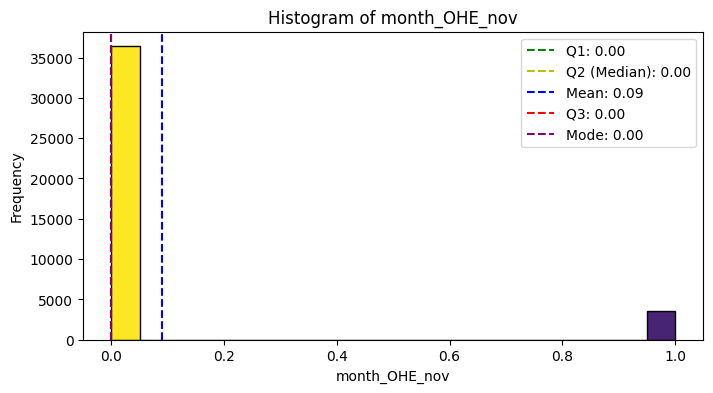

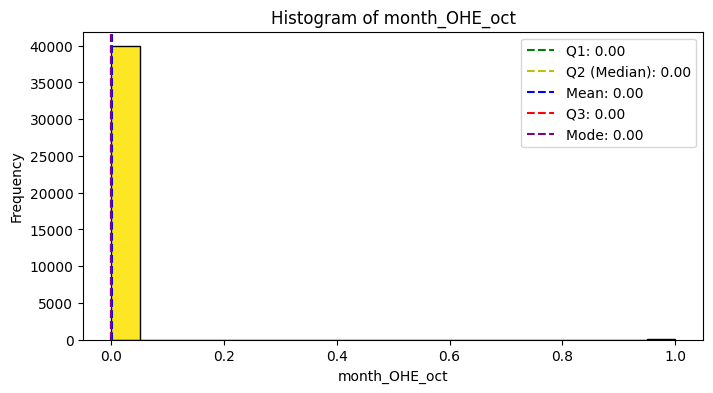

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the columns of interest. The histograms of encoded categories (LE and OHE) were constructud to see if variables are imbalanced
columnas = ["age", "balance", "day", "duration", "campaign", "default_LE", "housing_LE", "loan_LE", "y_LE", "job_OHE_admin", "job_OHE_blue-collar",
            "job_OHE_entrepreneur", "job_OHE_housemaid", "job_OHE_management", "job_OHE_retired", "job_OHE_self-employed", "job_OHE_services",
            "job_OHE_student", "job_OHE_technician", "job_OHE_unemployed", "job_OHE_unknown", "marital_OHE_divorced", "marital_OHE_married",
            "marital_OHE_single", "education_OHE_primary", "education_OHE_secondary", "education_OHE_tertiary", "education_OHE_unknown",
            "contact_OHE_cellular", "contact_OHE_telephone", "contact_OHE_unknown", "month_OHE_apr", "month_OHE_aug", "month_OHE_dec",
            "month_OHE_feb", "month_OHE_jan", "month_OHE_jul", "month_OHE_jun", "month_OHE_mar", "month_OHE_may", "month_OHE_nov", "month_OHE_oct"]

# Iterate over the columns to create the histograms.
for columna in columnas:
    # Calculate quartiles, mean and mode.
    Q1 = db[columna].quantile(0.25)
    Q2 = db[columna].quantile(0.50)
    media = db[columna].mean()
    Q3 = db[columna].quantile(0.75)
    moda = db[columna].mode()[0]

    # Create a figure for each histogram
    plt.figure(figsize=(8, 4))

    # Calculate the histogram
    counts, bins, patches = plt.hist(db[columna], bins=20, edgecolor='black')

    # Apply a colormap to the bars based on frequency
    for patch, count in zip(patches, counts):
        color = plt.cm.viridis(count / max(counts))  # Normalize count to range [0, 1]
        patch.set_facecolor(color)

    # Graph settings
    plt.title(f'Histogram of {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frequency')

    # Add lines for Q1, Q2, media, Q3, and moda
    plt.axvline(Q1, color='g', linestyle='--', label=f'Q1: {Q1:.2f}')
    plt.axvline(Q2, color='y', linestyle='--', label=f'Q2 (Median): {Q2:.2f}')
    plt.axvline(media, color='b', linestyle='--', label=f'Mean: {media:.2f}')
    plt.axvline(Q3, color='r', linestyle='--', label=f'Q3: {Q3:.2f}')
    plt.axvline(moda, color='purple', linestyle='--', label=f'Mode: {moda:.2f}')

    # Show legend
    plt.legend()

    # Show graph
    plt.show()

## Boxplots

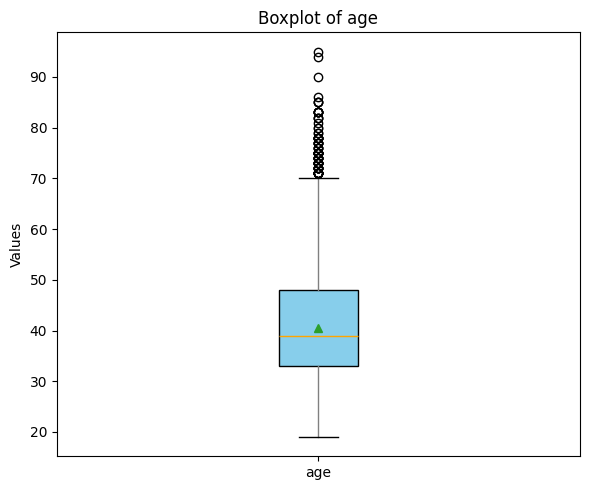

For the variable 'age', the distribution is as follows:
Median: 39.00
Mean: 40.54
1st Quartile (Q1): 33.00
3rd Quartile (Q3): 48.00
Interquartile Range (IQR): 15.00
Upper Whisker Limit: 70.50
Lower Whisker Limit: 10.50
--------------------------------------------------


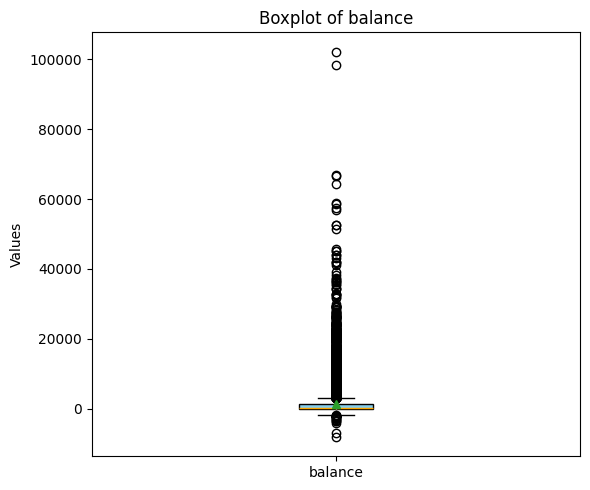

For the variable 'balance', the distribution is as follows:
Median: 407.00
Mean: 1274.28
1st Quartile (Q1): 54.00
3rd Quartile (Q3): 1319.00
Interquartile Range (IQR): 1265.00
Upper Whisker Limit: 3216.50
Lower Whisker Limit: -1843.50
--------------------------------------------------


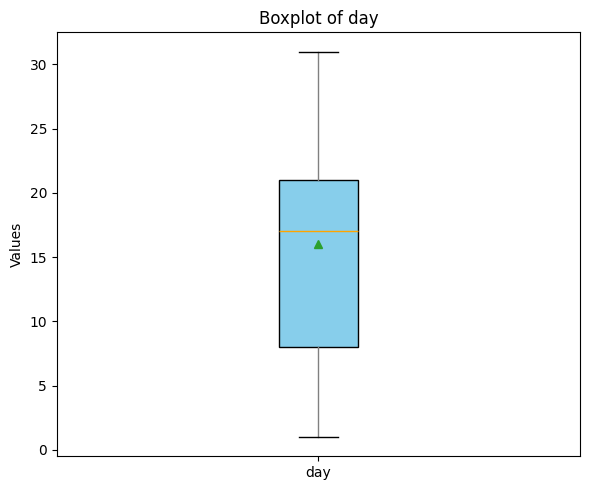

For the variable 'day', the distribution is as follows:
Median: 17.00
Mean: 16.02
1st Quartile (Q1): 8.00
3rd Quartile (Q3): 21.00
Interquartile Range (IQR): 13.00
Upper Whisker Limit: 40.50
Lower Whisker Limit: -11.50
--------------------------------------------------


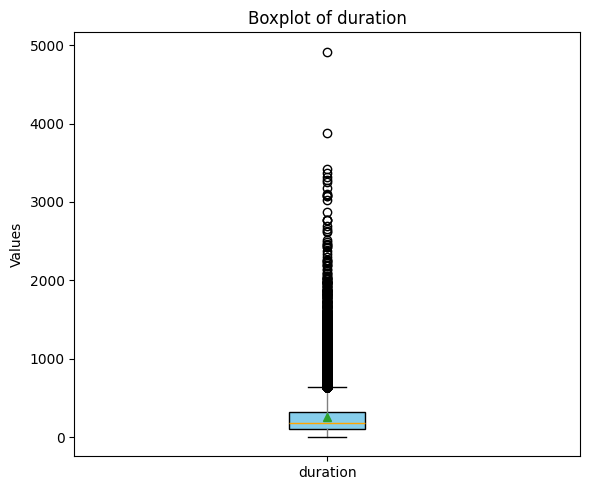

For the variable 'duration', the distribution is as follows:
Median: 175.00
Mean: 254.82
1st Quartile (Q1): 100.00
3rd Quartile (Q3): 313.00
Interquartile Range (IQR): 213.00
Upper Whisker Limit: 632.50
Lower Whisker Limit: -219.50
--------------------------------------------------


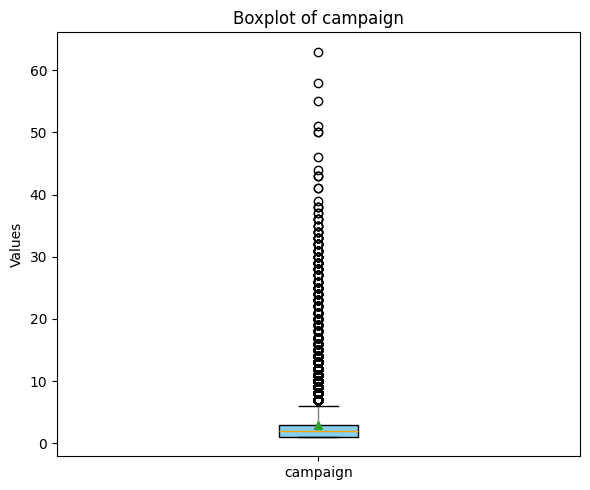

For the variable 'campaign', the distribution is as follows:
Median: 2.00
Mean: 2.88
1st Quartile (Q1): 1.00
3rd Quartile (Q3): 3.00
Interquartile Range (IQR): 2.00
Upper Whisker Limit: 6.00
Lower Whisker Limit: -2.00
--------------------------------------------------


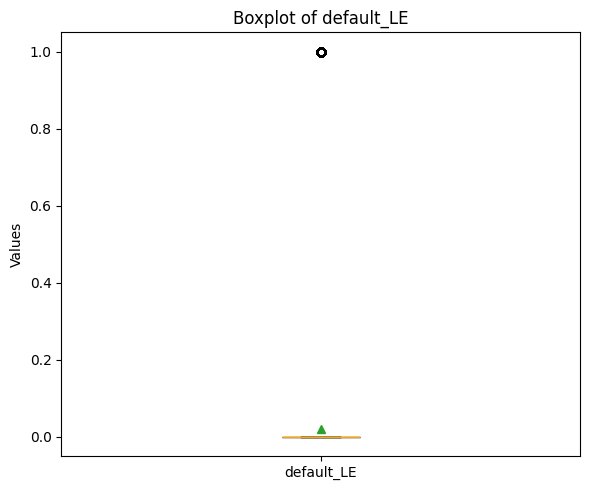

For the variable 'default_LE', the distribution is as follows:
Median: 0.00
Mean: 0.02
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


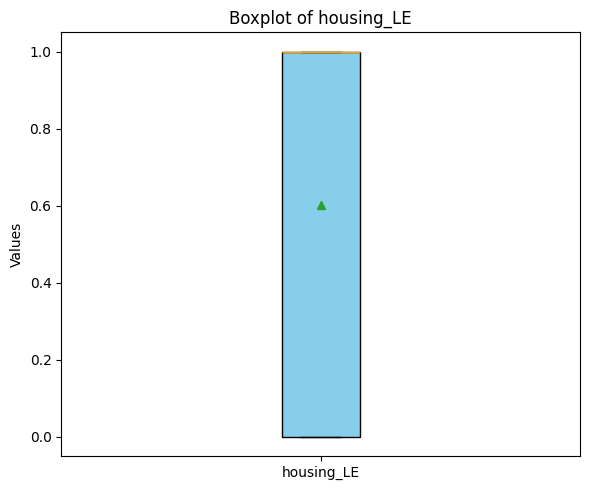

For the variable 'housing_LE', the distribution is as follows:
Median: 1.00
Mean: 0.60
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 1.00
Interquartile Range (IQR): 1.00
Upper Whisker Limit: 2.50
Lower Whisker Limit: -1.50
--------------------------------------------------


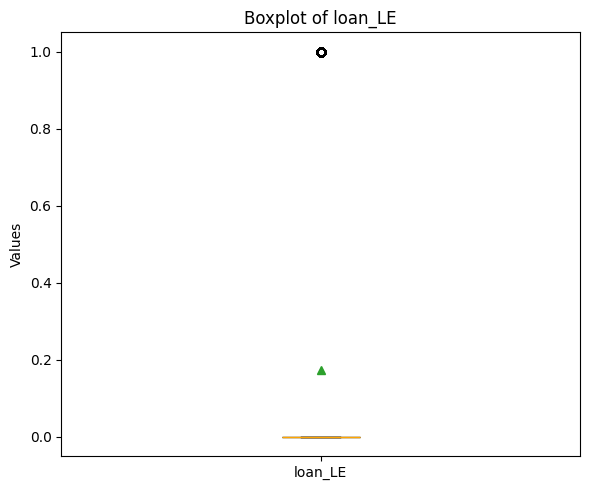

For the variable 'loan_LE', the distribution is as follows:
Median: 0.00
Mean: 0.17
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


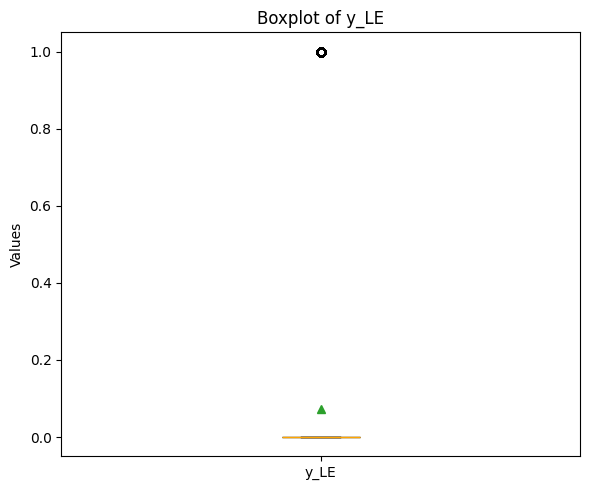

For the variable 'y_LE', the distribution is as follows:
Median: 0.00
Mean: 0.07
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


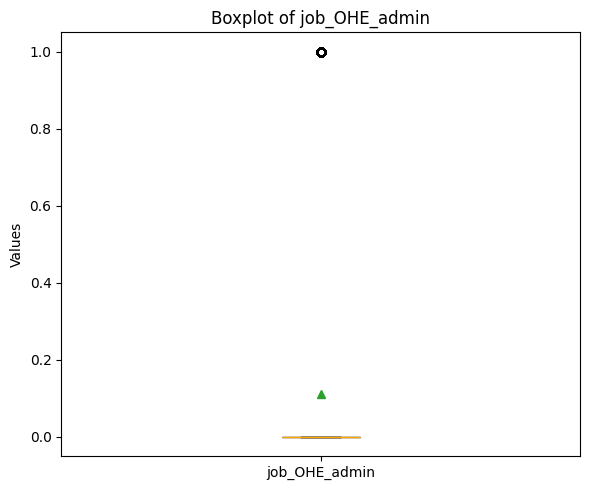

For the variable 'job_OHE_admin', the distribution is as follows:
Median: 0.00
Mean: 0.11
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


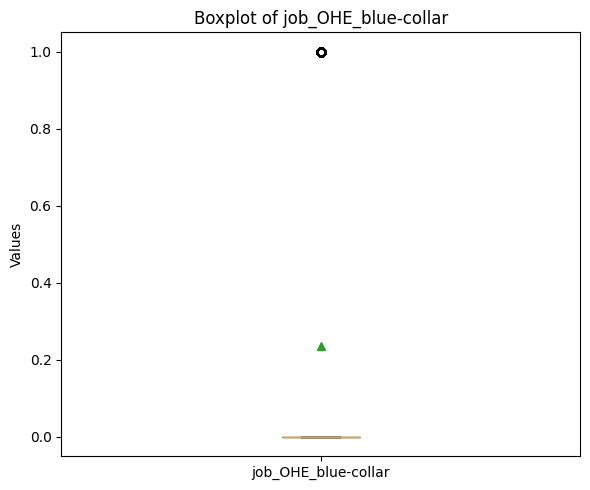

For the variable 'job_OHE_blue-collar', the distribution is as follows:
Median: 0.00
Mean: 0.23
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


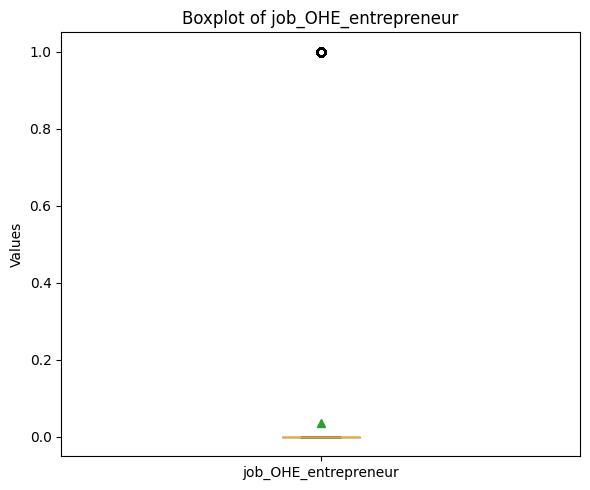

For the variable 'job_OHE_entrepreneur', the distribution is as follows:
Median: 0.00
Mean: 0.04
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


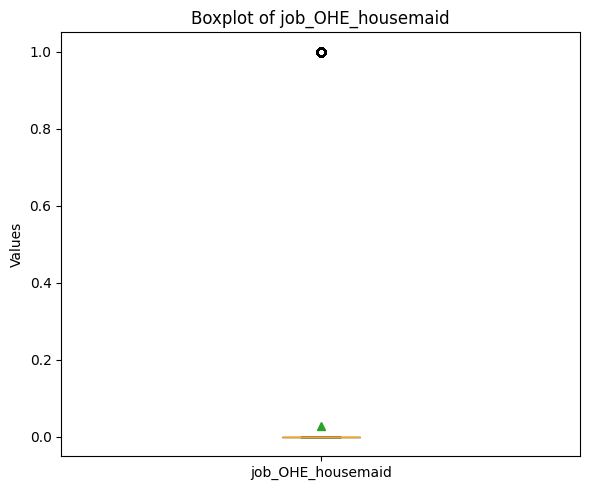

For the variable 'job_OHE_housemaid', the distribution is as follows:
Median: 0.00
Mean: 0.03
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


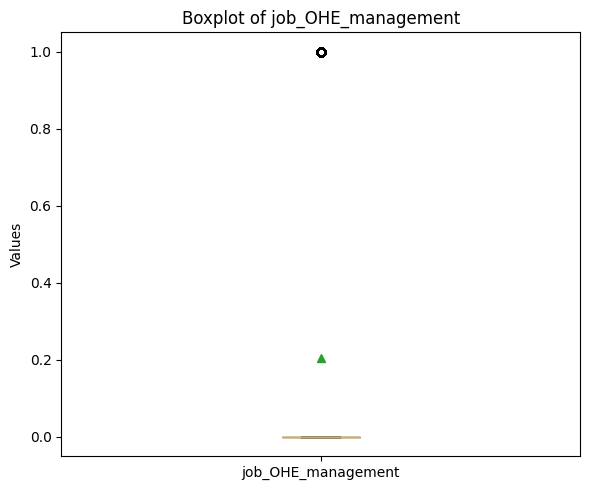

For the variable 'job_OHE_management', the distribution is as follows:
Median: 0.00
Mean: 0.20
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


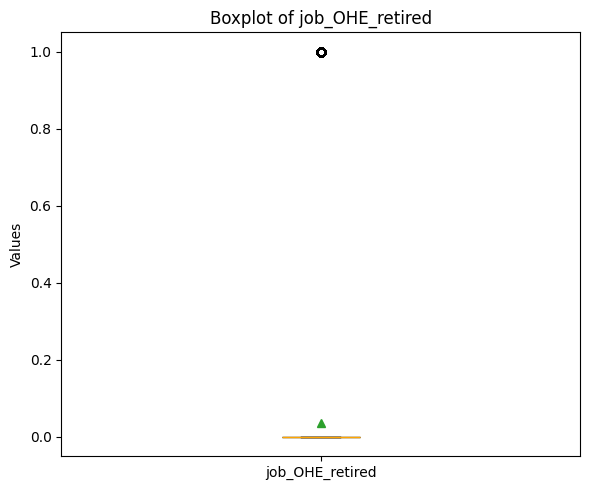

For the variable 'job_OHE_retired', the distribution is as follows:
Median: 0.00
Mean: 0.04
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


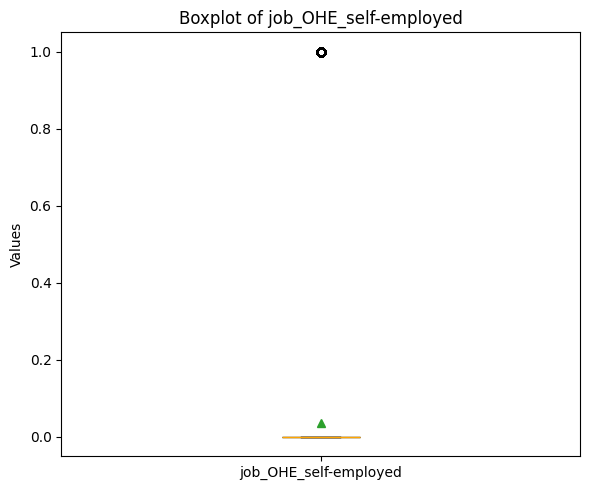

For the variable 'job_OHE_self-employed', the distribution is as follows:
Median: 0.00
Mean: 0.04
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


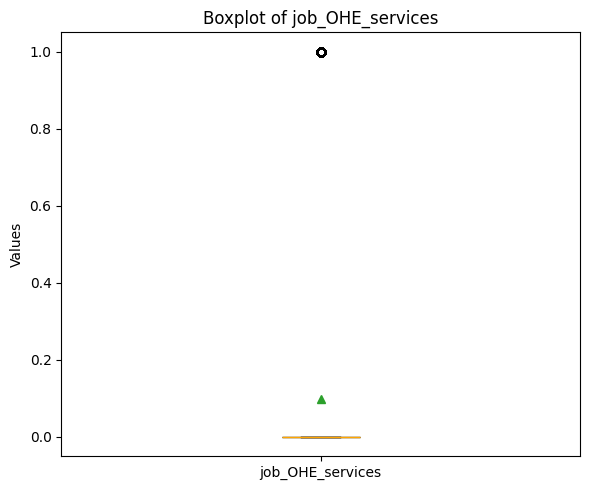

For the variable 'job_OHE_services', the distribution is as follows:
Median: 0.00
Mean: 0.10
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


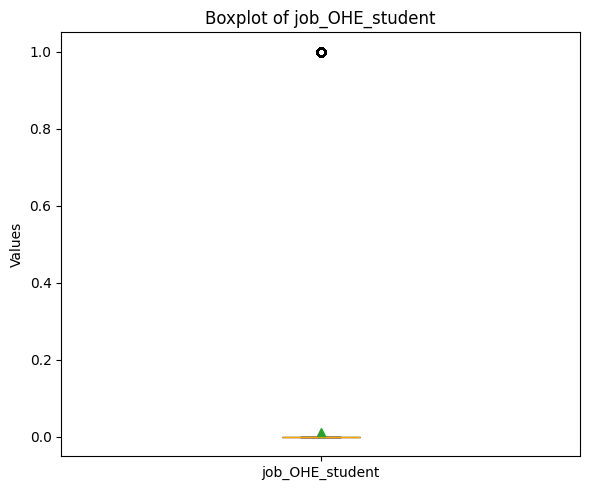

For the variable 'job_OHE_student', the distribution is as follows:
Median: 0.00
Mean: 0.01
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


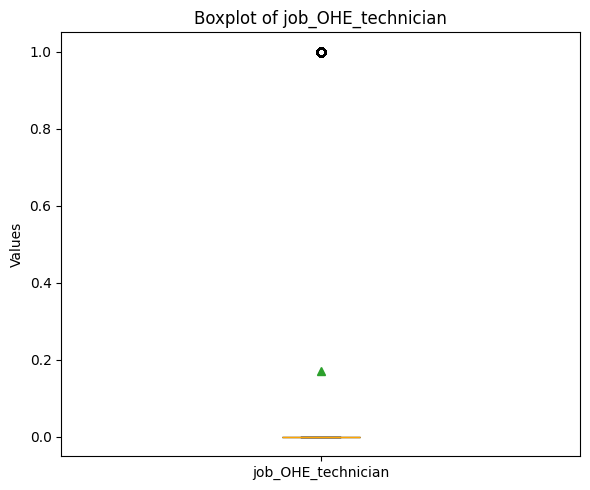

For the variable 'job_OHE_technician', the distribution is as follows:
Median: 0.00
Mean: 0.17
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


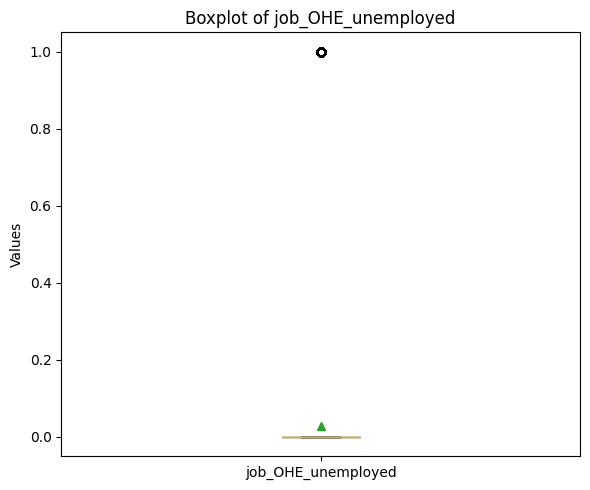

For the variable 'job_OHE_unemployed', the distribution is as follows:
Median: 0.00
Mean: 0.03
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


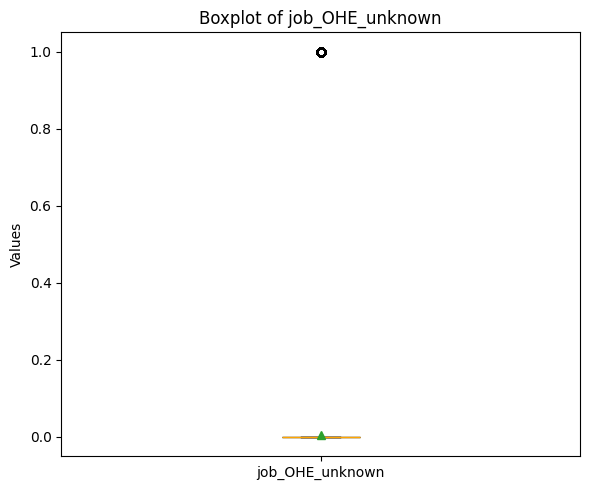

For the variable 'job_OHE_unknown', the distribution is as follows:
Median: 0.00
Mean: 0.01
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


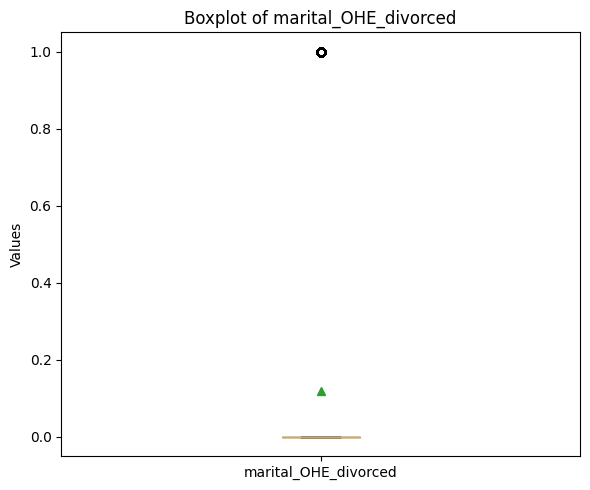

For the variable 'marital_OHE_divorced', the distribution is as follows:
Median: 0.00
Mean: 0.12
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


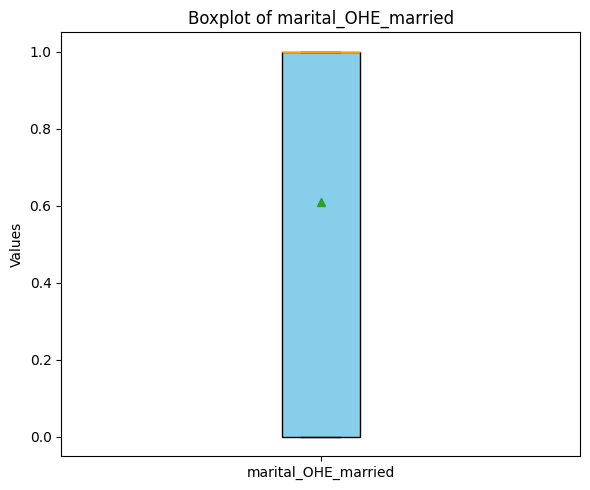

For the variable 'marital_OHE_married', the distribution is as follows:
Median: 1.00
Mean: 0.61
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 1.00
Interquartile Range (IQR): 1.00
Upper Whisker Limit: 2.50
Lower Whisker Limit: -1.50
--------------------------------------------------


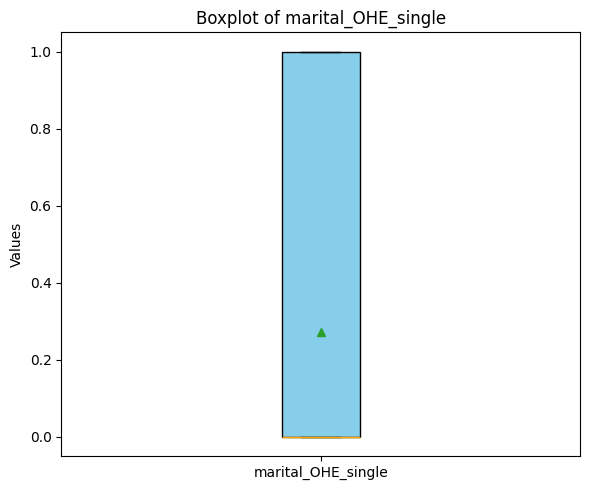

For the variable 'marital_OHE_single', the distribution is as follows:
Median: 0.00
Mean: 0.27
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 1.00
Interquartile Range (IQR): 1.00
Upper Whisker Limit: 2.50
Lower Whisker Limit: -1.50
--------------------------------------------------


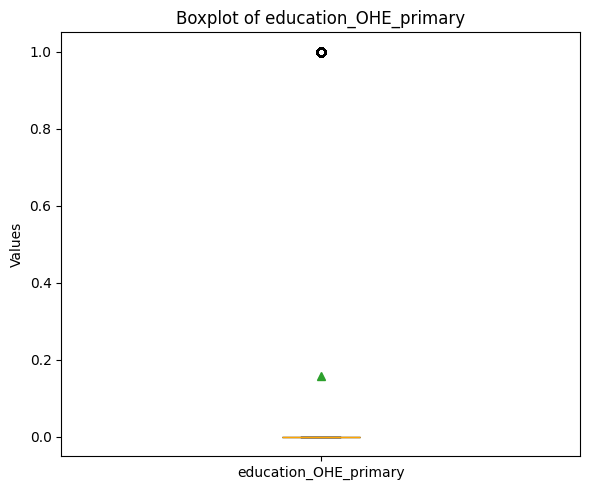

For the variable 'education_OHE_primary', the distribution is as follows:
Median: 0.00
Mean: 0.16
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


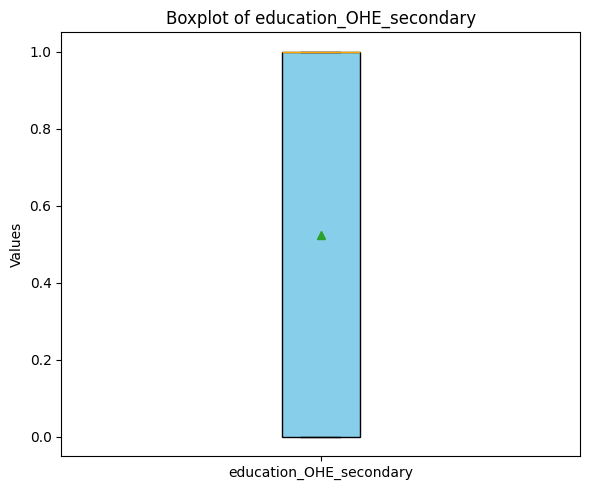

For the variable 'education_OHE_secondary', the distribution is as follows:
Median: 1.00
Mean: 0.52
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 1.00
Interquartile Range (IQR): 1.00
Upper Whisker Limit: 2.50
Lower Whisker Limit: -1.50
--------------------------------------------------


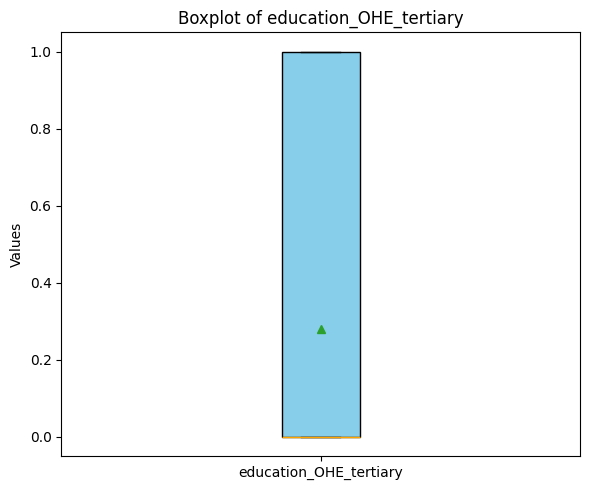

For the variable 'education_OHE_tertiary', the distribution is as follows:
Median: 0.00
Mean: 0.28
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 1.00
Interquartile Range (IQR): 1.00
Upper Whisker Limit: 2.50
Lower Whisker Limit: -1.50
--------------------------------------------------


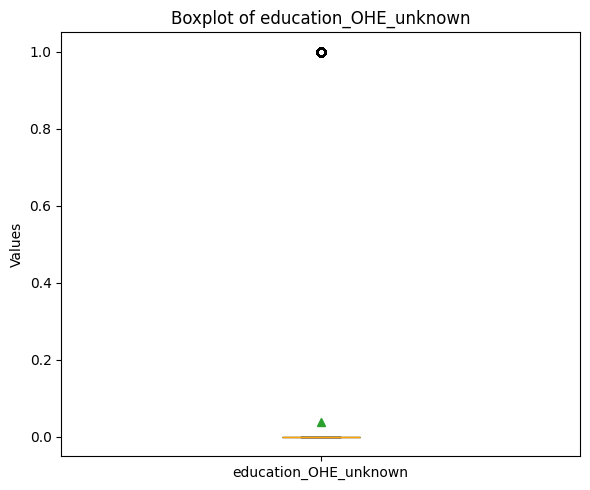

For the variable 'education_OHE_unknown', the distribution is as follows:
Median: 0.00
Mean: 0.04
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


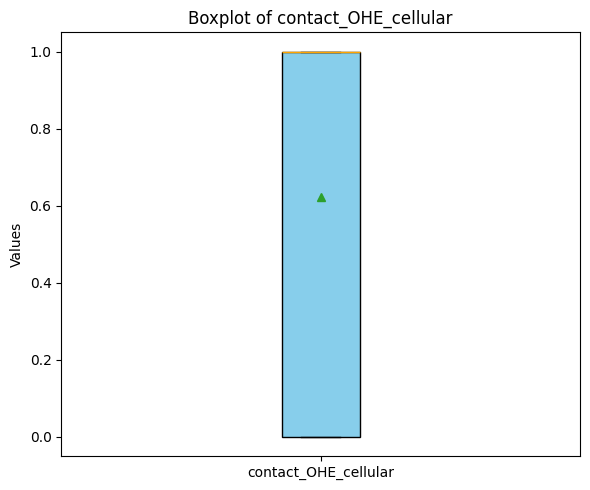

For the variable 'contact_OHE_cellular', the distribution is as follows:
Median: 1.00
Mean: 0.62
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 1.00
Interquartile Range (IQR): 1.00
Upper Whisker Limit: 2.50
Lower Whisker Limit: -1.50
--------------------------------------------------


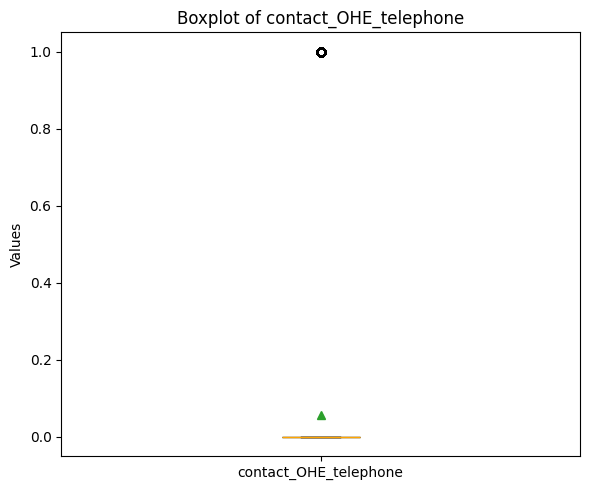

For the variable 'contact_OHE_telephone', the distribution is as follows:
Median: 0.00
Mean: 0.06
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


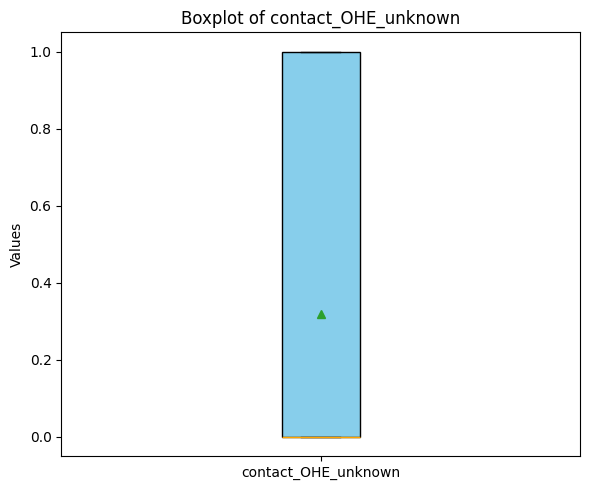

For the variable 'contact_OHE_unknown', the distribution is as follows:
Median: 0.00
Mean: 0.32
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 1.00
Interquartile Range (IQR): 1.00
Upper Whisker Limit: 2.50
Lower Whisker Limit: -1.50
--------------------------------------------------


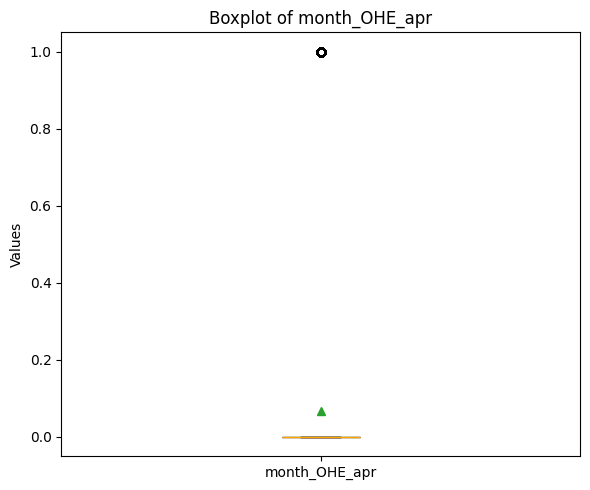

For the variable 'month_OHE_apr', the distribution is as follows:
Median: 0.00
Mean: 0.07
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


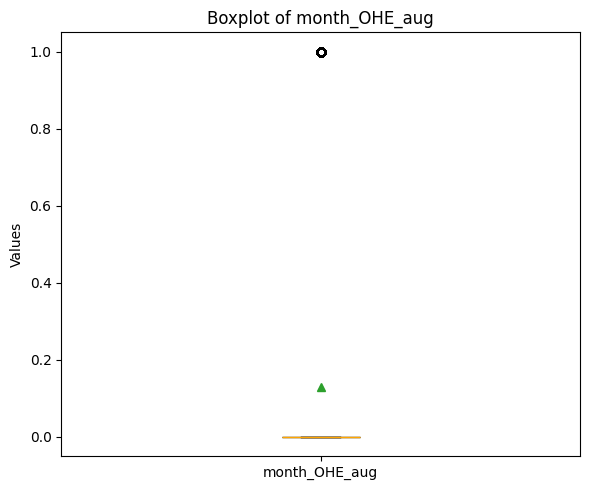

For the variable 'month_OHE_aug', the distribution is as follows:
Median: 0.00
Mean: 0.13
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


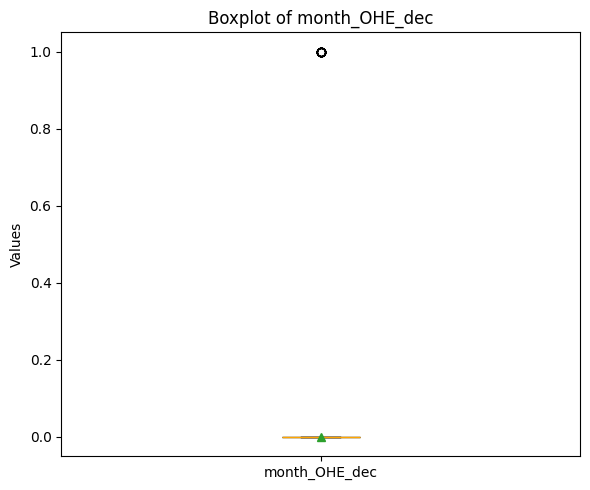

For the variable 'month_OHE_dec', the distribution is as follows:
Median: 0.00
Mean: 0.00
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


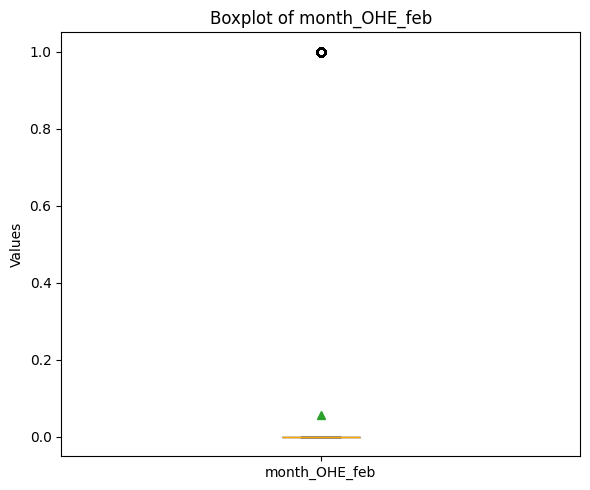

For the variable 'month_OHE_feb', the distribution is as follows:
Median: 0.00
Mean: 0.06
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


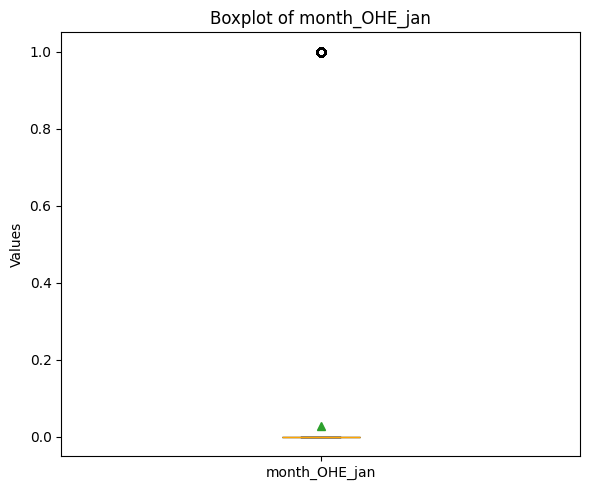

For the variable 'month_OHE_jan', the distribution is as follows:
Median: 0.00
Mean: 0.03
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


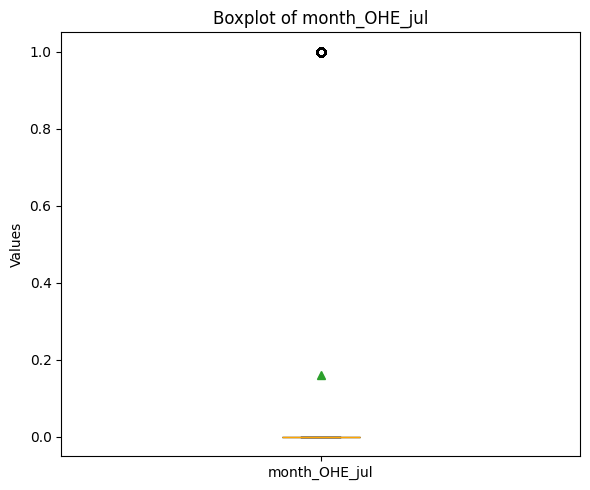

For the variable 'month_OHE_jul', the distribution is as follows:
Median: 0.00
Mean: 0.16
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


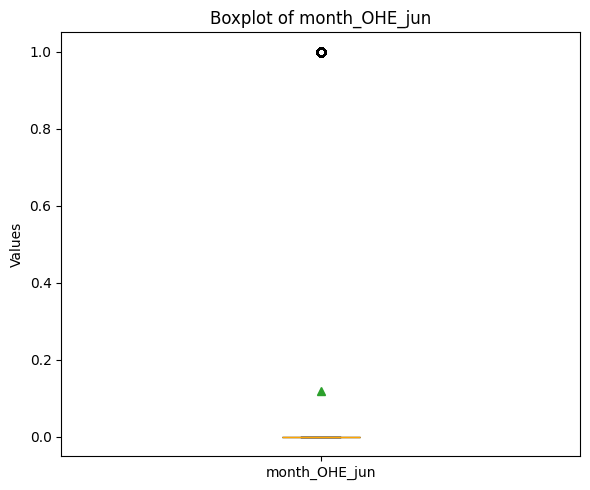

For the variable 'month_OHE_jun', the distribution is as follows:
Median: 0.00
Mean: 0.12
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


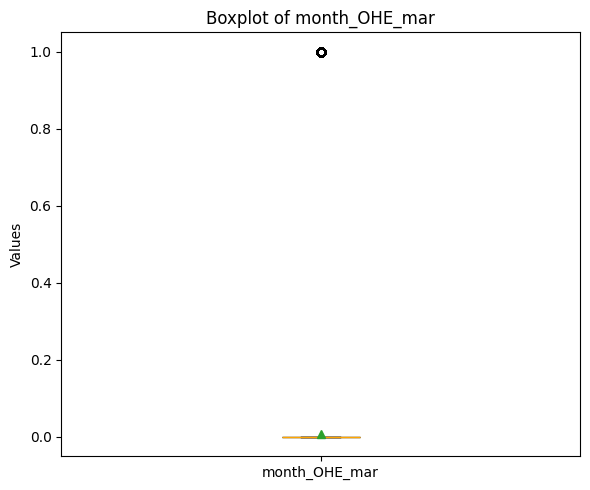

For the variable 'month_OHE_mar', the distribution is as follows:
Median: 0.00
Mean: 0.01
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


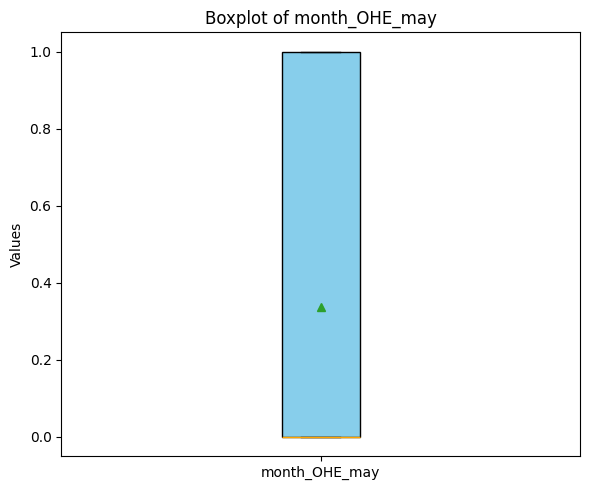

For the variable 'month_OHE_may', the distribution is as follows:
Median: 0.00
Mean: 0.34
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 1.00
Interquartile Range (IQR): 1.00
Upper Whisker Limit: 2.50
Lower Whisker Limit: -1.50
--------------------------------------------------


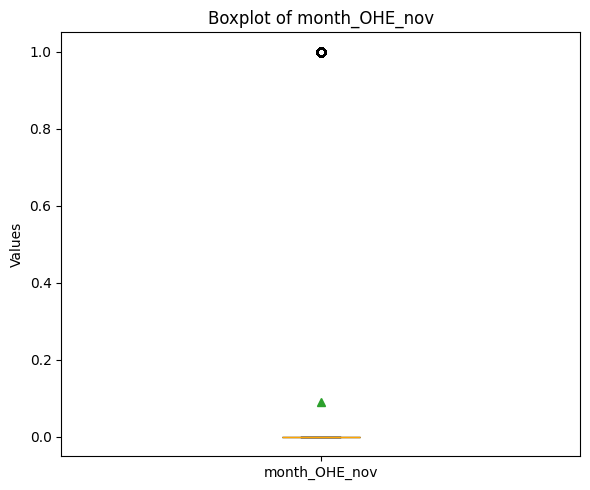

For the variable 'month_OHE_nov', the distribution is as follows:
Median: 0.00
Mean: 0.09
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


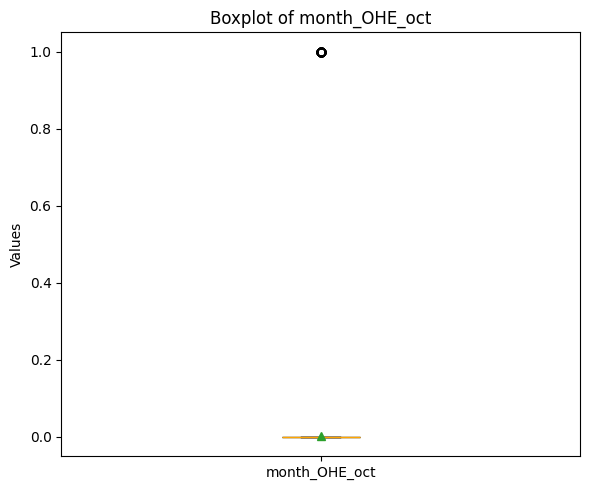

For the variable 'month_OHE_oct', the distribution is as follows:
Median: 0.00
Mean: 0.00
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 0.00
Interquartile Range (IQR): 0.00
Upper Whisker Limit: 0.00
Lower Whisker Limit: 0.00
--------------------------------------------------


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# List of numeric columns to analyze
#col = ["age", "balance", "day", "duration", "campaign", "job_LE", "marital_LE", "education_LE",
#       "default_LE", "housing_LE", "loan_LE", "contact_LE", "month_LE", "y_LE"]

columnas = ["age", "balance", "day", "duration", "campaign", "default_LE", "housing_LE", "loan_LE", "y_LE", "job_OHE_admin", "job_OHE_blue-collar",
            "job_OHE_entrepreneur", "job_OHE_housemaid", "job_OHE_management", "job_OHE_retired", "job_OHE_self-employed", "job_OHE_services",
            "job_OHE_student", "job_OHE_technician", "job_OHE_unemployed", "job_OHE_unknown", "marital_OHE_divorced", "marital_OHE_married",
            "marital_OHE_single", "education_OHE_primary", "education_OHE_secondary", "education_OHE_tertiary", "education_OHE_unknown",
            "contact_OHE_cellular", "contact_OHE_telephone", "contact_OHE_unknown", "month_OHE_apr", "month_OHE_aug", "month_OHE_dec",
            "month_OHE_feb", "month_OHE_jan", "month_OHE_jul", "month_OHE_jun", "month_OHE_mar", "month_OHE_may", "month_OHE_nov", "month_OHE_oct"]

# Generate individual boxplots for each variable
for column in columnas:  # Change columns_numeric to col
    # Calculate statistics for the current column
    mediana = np.median(db[column])
    media = np.mean(db[column])
    Q1 = np.percentile(db[column], 25)
    Q3 = np.percentile(db[column], 75)
    IQR = Q3 - Q1
    bigote_superior = Q3 + 1.5 * IQR
    bigote_inferior = Q1 - 1.5 * IQR

    # Plot the boxplot
    plt.figure(figsize=(6, 5))  # Set the figure size for each plot
    plt.boxplot(db[column].values,
                patch_artist=True,  # Enable custom styles for the box
                showmeans=True,  # Display the mean value as a marker
                boxprops=dict(facecolor='skyblue'),  # Set the box color
                meanprops=dict(color='green'),  # Style for the mean marker
                medianprops=dict(color='orange'),  # Style for the median line
                whiskerprops=dict(color='gray'))  # Style for whiskers

    # Add title and labels
    plt.title(f'Boxplot of {column}')  # Add the variable name to the title
    plt.xticks([1], [column])  # Keep x-axis label for a single variable
    plt.ylabel('Values')  # Label for the y-axis

    # Adjust layout
    plt.tight_layout()
    plt.show()  # Display the plot

    # Print statistics below the plot
    print(f"For the variable '{column}', the distribution is as follows:")
    print(f"Median: {mediana:.2f}")
    print(f"Mean: {media:.2f}")
    print(f"1st Quartile (Q1): {Q1:.2f}")
    print(f"3rd Quartile (Q3): {Q3:.2f}")
    print(f"Interquartile Range (IQR): {IQR:.2f}")
    print(f"Upper Whisker Limit: {bigote_superior:.2f}")
    print(f"Lower Whisker Limit: {bigote_inferior:.2f}")
    print("-" * 50)  # Separator for readability


## **Quick Bivariate Analysis**

## Scatter plots

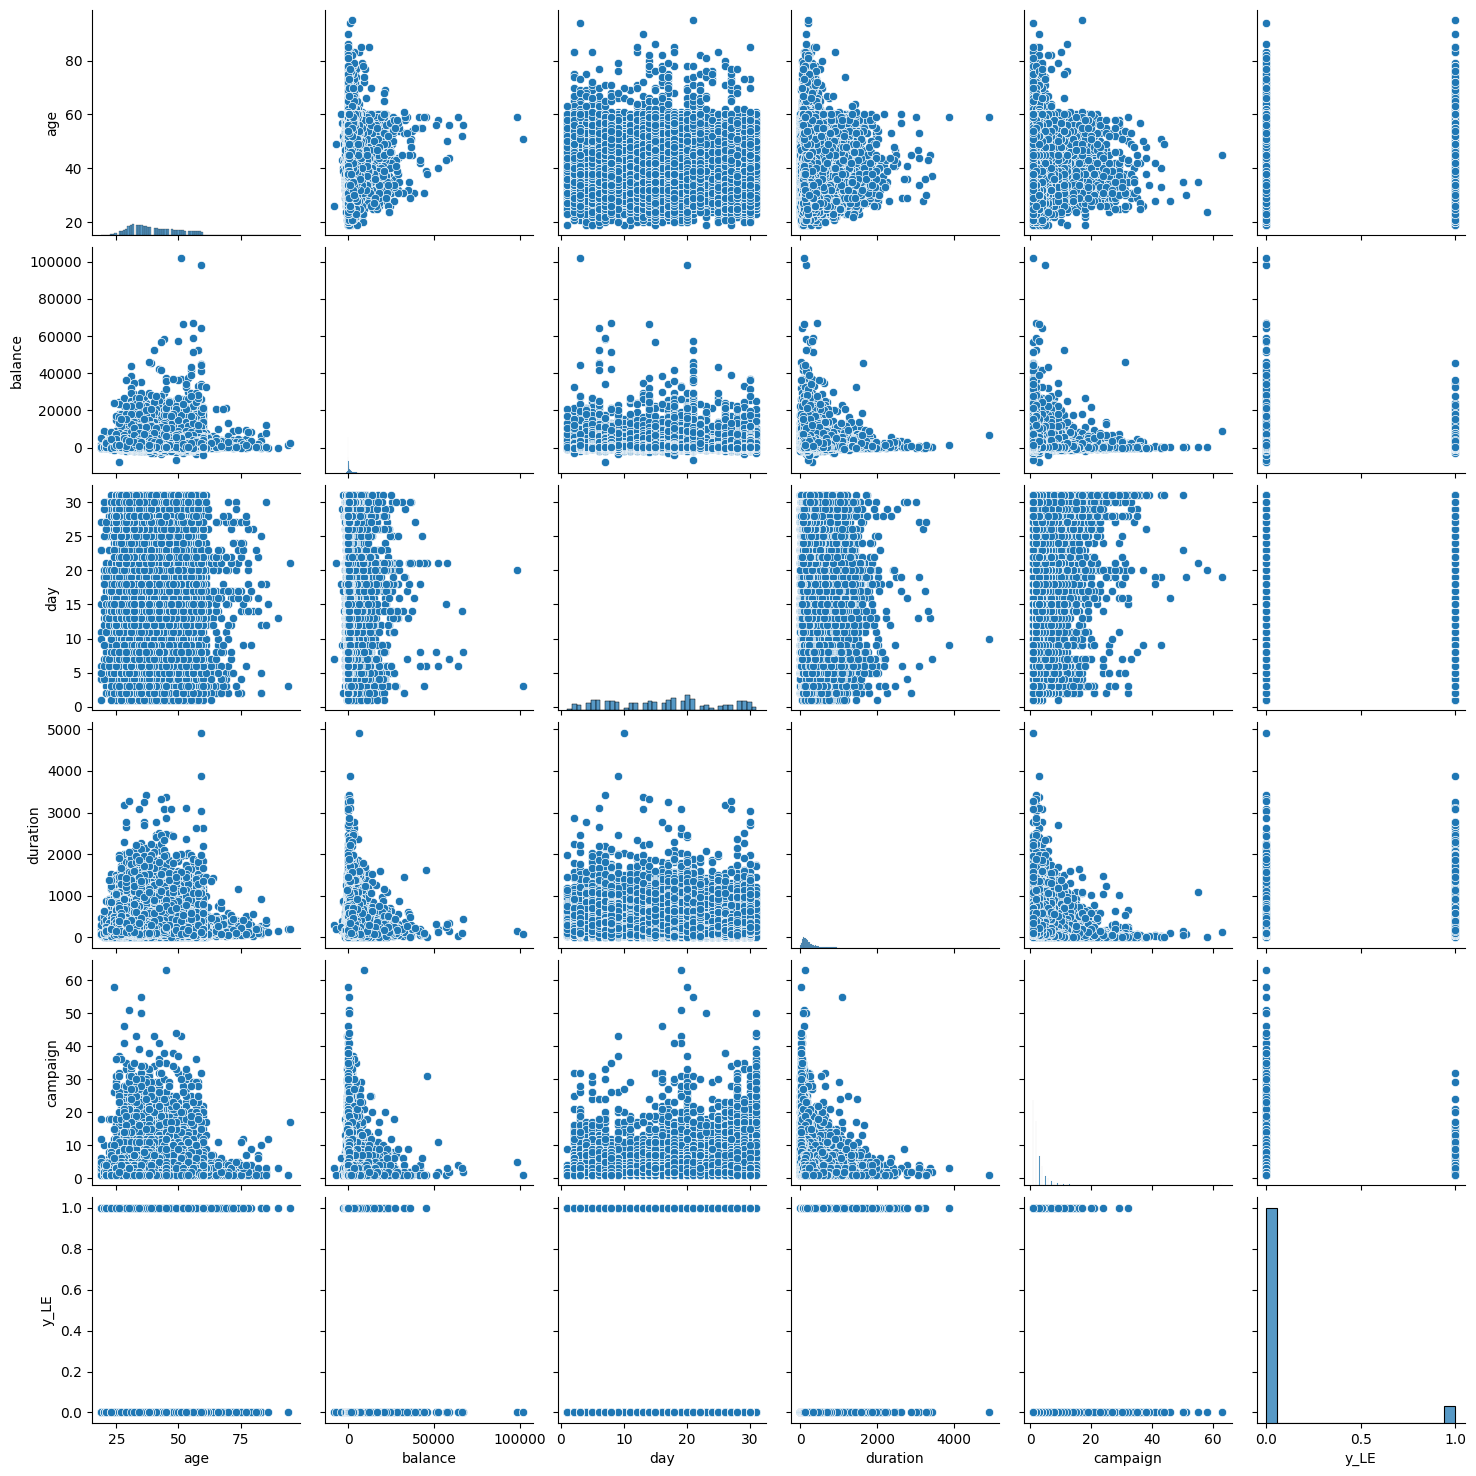

In [16]:
# We select numeric columns that can be plotted (some encoded variables are not plotted)

columnas = ["age", "balance", "day", "duration", "campaign", "y_LE"]

# Visualize the data sns
sns.pairplot(db, vars=columnas)

## Heat Maps

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       40000 non-null  int64
 1   balance   40000 non-null  int64
 2   day       40000 non-null  int64
 3   duration  40000 non-null  int64
 4   campaign  40000 non-null  int64
 5   y_LE      40000 non-null  int64
dtypes: int64(6)
memory usage: 1.8 MB
None
                age        balance           day      duration      campaign  \
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000   
mean      40.544600    1274.277550     16.017225    254.824300      2.882175   
std        9.641776    2903.769716      8.278127    259.366498      3.239051   
min       19.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      54.000000      8.000000    100.000000      1.000000   
50%       39.000000     407.000000     17.000000    175.000000      2.000

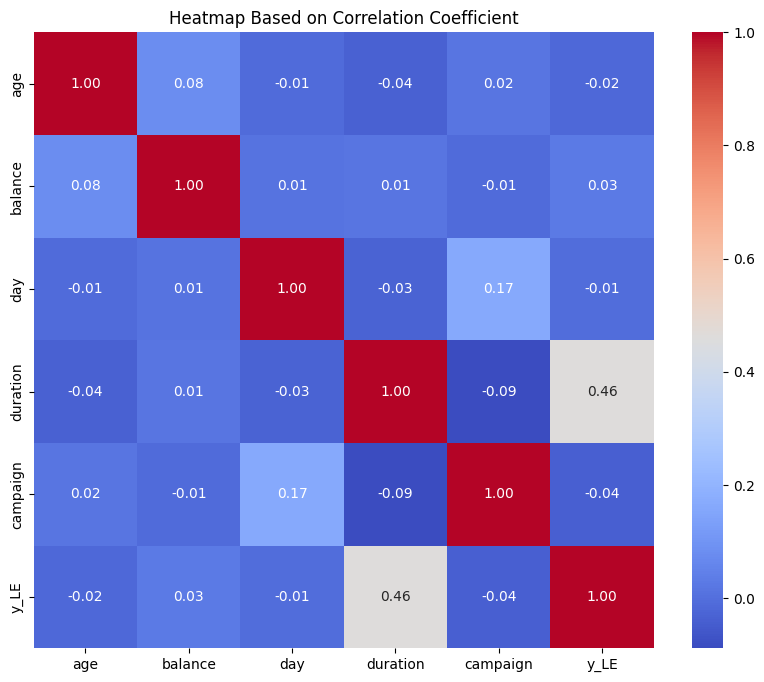

In [17]:
# Filtrar el DataFrame para incluir solo las variables de interés
columnas = ["age", "balance", "day", "duration", "campaign", "y_LE"]

db_filt = db[columnas]

print(db_filt.info())  # Información sobre tipos de datos y valores nulos
print(db_filt.describe())  # Estadísticas generales
print(db_filt.head())  # Primeras filas para revisión rápida

# Calculate the correlation matrix
correlation_matrix = db_filt.corr()

# Create a heatmap with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Based on Correlation Coefficient')

plt.show()


# **4. ALGORITHMS**

# **4.1 - LOGISTIC REGRESSION**

## **4.1.1 - Logistic Regression considering all predictors**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #we import the LogisticRegression class from scikit-learn.

In [19]:
# Split data in training and test groups
X_before_SMOTE = db[['default_LE', 'housing_LE', 'loan_LE', 'job_OHE_admin', 'job_OHE_blue-collar', 'job_OHE_entrepreneur', 'job_OHE_housemaid',
                     'job_OHE_management', 'job_OHE_retired', 'job_OHE_self-employed', 'job_OHE_services', 'job_OHE_student', 'job_OHE_technician',
                     'job_OHE_unemployed', 'job_OHE_unknown', 'marital_OHE_divorced', 'marital_OHE_married', 'marital_OHE_single', 'education_OHE_primary',
                     'education_OHE_secondary', 'education_OHE_tertiary', 'education_OHE_unknown', 'contact_OHE_cellular', 'contact_OHE_telephone',
                     'contact_OHE_unknown', 'month_OHE_apr', 'month_OHE_aug', 'month_OHE_dec', 'month_OHE_feb', 'month_OHE_jan', 'month_OHE_jul',
                     'month_OHE_jun', 'month_OHE_mar', 'month_OHE_may', 'month_OHE_nov', 'month_OHE_oct', 'day_norm', 'age_std' , 'balance_robust',
                     'duration_robust', 'campaign_robust']]
#X_before_SMOTE is composed by the 42 preprocessed by encoding, scaling BUT NOT preprocessed by unbalanced classes (SMOTE)
# x_smote are the 42 predictores preprocessed by encoding, scaling and SMOTE. It was obteined in 2. Preprocessing / Unsampling-Oversampling

y = db[['y_LE']]
X_before_SMOTE_train, X_before_SMOTE_test, y_train, y_test = train_test_split(X_before_SMOTE, y, test_size=0.1, random_state=42)  # 10% for test, 90% for training

# Instantiate and train the logistic regression model.
logistic_regression_original = LogisticRegression()
logistic_regression_original.fit(X_before_SMOTE_train, y_train)

# Obtain the coefficients and the intercept
coeficients = logistic_regression_original.coef_
intercept = logistic_regression_original.intercept_

# Show the results
# Get the variable names (columns of X)
variable_names = X_before_SMOTE.columns

# Get the coefficients
coefficients = logistic_regression_original.coef_[0]  # .coef_ is a list of arrays, so we access the first element

# Print each coefficient with its corresponding variable
print("Coefficients and variables:")
for var, coef in zip(variable_names, coefficients):
    print(f"{var}: {coef}")

# Print the intercept
print("\nIntercept:", logistic_regression_original.intercept_[0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients and variables:
default_LE: 0.2636513217267263
housing_LE: -0.6671526433427204
loan_LE: -0.2877846850630923
job_OHE_admin: 0.020829632910281694
job_OHE_blue-collar: -0.25736348230817835
job_OHE_entrepreneur: -0.2816899475994839
job_OHE_housemaid: -0.6578343210344635
job_OHE_management: -0.15061269564869684
job_OHE_retired: 0.2940624571862652
job_OHE_self-employed: -0.2947109388415329
job_OHE_services: -0.20823618841747193
job_OHE_student: 0.2770748551174316
job_OHE_technician: -0.07723062685889724
job_OHE_unemployed: -0.2738179012640479
job_OHE_unknown: 0.06261387649551414
marital_OHE_divorced: -0.4354023346521706
marital_OHE_married: -0.6993332824975248
marital_OHE_single: -0.41217966311354587
education_OHE_primary: -0.4753808882797814
education_OHE_secondary: -0.38453709090442034
education_OHE_tertiary: -0.13379196039989527
education_OHE_unknown: -0.5532053406791213
contact_OHE_cellular: 0.2797745542863164
contact_OHE_telephone: -0.14942108864658696
contact_OHE_unknown: -

## **Evaluate the Model (globally)**

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions in the testing group
y_pred_logistic = logistic_regression_original.predict(X_before_SMOTE_test)

# Calculate precision, recall y F1-score
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)

# Show results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}") #y is not considerabily desbalanced but we also calculate F1-Score

Precision: 0.6076923076923076
Recall: 0.2771929824561403
F1-Score: 0.38072289156626504


## **4.1.2 - Logistic Regression considering predictors  with coefficients less than -0.5 and higher than 0.5**

In [21]:
# Split data in training and test groups
X_before_SMOTE_log1 = db[['job_OHE_housemaid', 'marital_OHE_married', 'education_OHE_unknown', 'contact_OHE_unknown', 'month_OHE_aug', 'month_OHE_jan', 'month_OHE_jul',
        'month_OHE_mar', 'month_OHE_nov', 'month_OHE_oct', 'day_norm', 'duration_robust']]

y = db[['y_LE']]
X_before_SMOTE_log1_train, X_before_SMOTE_log1_test, y_train, y_test = train_test_split(X_before_SMOTE_log1, y, test_size=0.1, random_state=42)  # 10% for test, 90% for training

# Instantiate and train the logistic regression model.
logistic_regression_log1 = LogisticRegression()
logistic_regression_log1.fit(X_before_SMOTE_log1_train, y_train)

# Obtain the coefficients and the intercept
coeficients = logistic_regression_log1.coef_ # .coef_ is a list of arrays, so we access the first element
intercept = logistic_regression_log1.intercept_

# Show the results
# Get the variable names (columns of X)
variable_names = X_before_SMOTE_log1.columns

# Print each coefficient with its corresponding variable
print("Coefficients and variables:")
for var, coef in zip(variable_names, coefficients):
    print(f"{var}: {coef}")

# Print the intercept
print("\nIntercept:", logistic_regression_log1.intercept_[0])

Coefficients and variables:
job_OHE_housemaid: 0.2636513217267263
marital_OHE_married: -0.6671526433427204
education_OHE_unknown: -0.2877846850630923
contact_OHE_unknown: 0.020829632910281694
month_OHE_aug: -0.25736348230817835
month_OHE_jan: -0.2816899475994839
month_OHE_jul: -0.6578343210344635
month_OHE_mar: -0.15061269564869684
month_OHE_nov: 0.2940624571862652
month_OHE_oct: -0.2947109388415329
day_norm: -0.20823618841747193
duration_robust: 0.2770748551174316

Intercept: -2.888168589217815


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Evaluate the Model** - Case: features with coefficients less than -0.5 and higher than 0.5

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3715
           1       0.59      0.27      0.37       285

    accuracy                           0.93      4000
   macro avg       0.77      0.63      0.67      4000
weighted avg       0.92      0.93      0.92      4000

Model Accuracy: 0.93


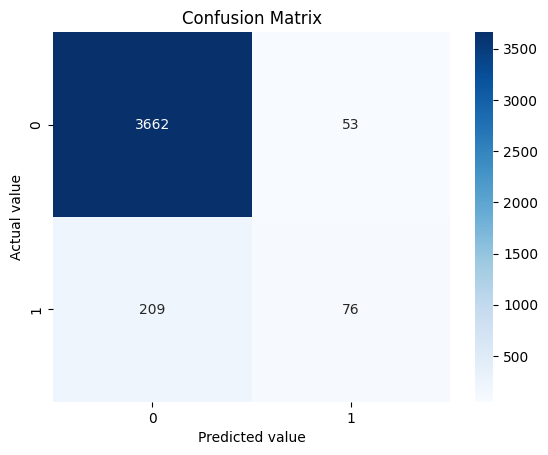

In [22]:
# Importar las librerías necesarias
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
y_pred_log1 = logistic_regression_log1.predict(X_before_SMOTE_log1_test)

# Generar de las métricas de rendimiento del modelo de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_log1))

# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred_log1)
print(f"Model Accuracy: {accuracy:.2f}")  # Mostrará la exactitud con 2 decimales

# Calcular la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_log1)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

**ANALISIS DEL REPORTE Y CONCLUSIONES:**

ACCURACY (93%):

La exactitud global es alta, pero no refleja adecuadamente el rendimiento para la clase menos representada (clase 1) debido al desbalance de clases (3715 instancias de la clase 0 frente a solo 285 de la clase 1).
Como la clase 0 domina, el modelo puede acertar muchas predicciones solo clasificando la mayoría de las instancias como 0.

PRECISION (0.59 para clase 1):
La precisión baja para la clase 1 indica que hay muchos falsos positivos (instancias clasificadas como 1 que realmente son 0). Esto significa que el modelo tiene dificultades para identificar correctamente los casos positivos.

RECALL (0.27 para clase 1):
Un recall bajo para la clase 1 implica muchos falsos negativos (instancias clasificadas como 0 que realmente son 1). Esto es preocupante en problemas donde es crucial detectar la clase minoritaria (como en este caso).

F1-SCORE (0.37 para clase 1):
El F1-Score combina precisión y recall, y un valor de 0.37 refleja un bajo balance entre ambas métricas para la clase 1. Esto indica que el modelo no está manejando bien la clase minoritaria.
Macro Avg vs Weighted Avg:

El promedio macro (no ponderado) muestra valores más bajos (recall 0.63, F1-score 0.67), lo que confirma que el modelo no es equilibrado entre clases.
El promedio ponderado (dominado por la clase 0) presenta valores altos, pero esto no debe considerarse indicativo de un buen rendimiento general debido al desbalance de clases.

**REPORT ANALYSIS AND CONCLUSIONS:**

ACCURACY (93%):
The overall accuracy is high but does not adequately reflect the performance for the less-represented class (class 1) due to class imbalance (3,715 instances of class 0 versus only 285 of class 1).
Since class 0 dominates, the model can achieve many correct predictions simply by classifying most instances as 0.

PRECISION (0.59 for class 1):
The low precision for class 1 indicates a high number of false positives (instances classified as 1 that are actually 0). This suggests the model struggles to correctly identify positive cases.

RECALL (0.27 for class 1):
The low recall for class 1 implies a high number of false negatives (instances classified as 0 that are actually 1). This is concerning in problems where detecting the minority class is crucial (as in this case).

F1-SCORE (0.37 for class 1):
The F1-score combines precision and recall, and a value of 0.37 reflects a poor balance between these metrics for class 1. This indicates that the model is not effectively handling the minority class.

Macro Avg vs Weighted Avg:

The macro average (unweighted) shows lower values (recall 0.63, F1-score 0.67), confirming that the model is not balanced across classes.
The weighted average (dominated by class 0) shows higher values, but this should not be considered indicative of good overall performance due to the class imbalance.

## **4.1.3 - Logistic Regression with BALANCED classes (class_weight='balanced') and considering predictors with coefficients less than -0.5 or higher than 0.5**

In [23]:
# Split data in training and test groups
X_before_SMOTE_log1 = db[['job_OHE_housemaid', 'marital_OHE_married', 'education_OHE_unknown', 'contact_OHE_unknown', 'month_OHE_aug', 'month_OHE_jan', 'month_OHE_jul',
        'month_OHE_mar', 'month_OHE_nov', 'month_OHE_oct', 'day_norm', 'duration_robust']]
y = db[['y_LE']]
X_before_SMOTE_log1_train, X_before_SMOTE_log1_test, y_train, y_test = train_test_split(X_before_SMOTE_log1, y, test_size=0.1, random_state=42)  # 10% for test, 90% for training

# Instantiate and train the logistic regression model.
logistic_regression_bal = LogisticRegression(class_weight='balanced')
logistic_regression_bal.fit(X_before_SMOTE_log1_train, y_train)

# Obtain the coefficients and the intercept
coefficients_bal = logistic_regression_bal.coef_[0]  # .coef_ es una lista de arrays, accedemos al primero
intercept_bal = logistic_regression_bal.intercept_[0]

# Show the results
# Get the variable names (columns of X_log)
variable_names = X_before_SMOTE_log1.columns

# Print each coefficient with its corresponding variable
print("Coefficients and variables (balanced):")
for var, coef in zip(variable_names, coefficients_bal):
    print(f"{var}: {coef}")

# Print the intercept
print("\nIntercept:", logistic_regression_bal.intercept_[0])
print("\nIntercept (balanced):", intercept_bal)


Coefficients and variables (balanced):
job_OHE_housemaid: -0.3022977542920304
marital_OHE_married: -0.35308552258809084
education_OHE_unknown: 0.05517099037913212
contact_OHE_unknown: -2.367701443303332
month_OHE_aug: -1.6348675267979706
month_OHE_jan: -3.2999960904529533
month_OHE_jul: -1.922498930268209
month_OHE_mar: 2.6910054730292075
month_OHE_nov: -1.3826811890322706
month_OHE_oct: 4.248327092780647
day_norm: 0.5928807402132197
duration_robust: 1.4728410181023701

Intercept: -0.49187048913000103

Intercept (balanced): -0.49187048913000103


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Evaluate the Model** - Case: features with BALANCED CLASSES (class_weight='balanced') and coefficients less than -0.5 or higher than 0.5

Classification Report (Balanced):
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      3715
           1       0.32      0.81      0.46       285

    accuracy                           0.86      4000
   macro avg       0.65      0.84      0.69      4000
weighted avg       0.94      0.86      0.89      4000

Model Accuracy (Balanced): 0.86


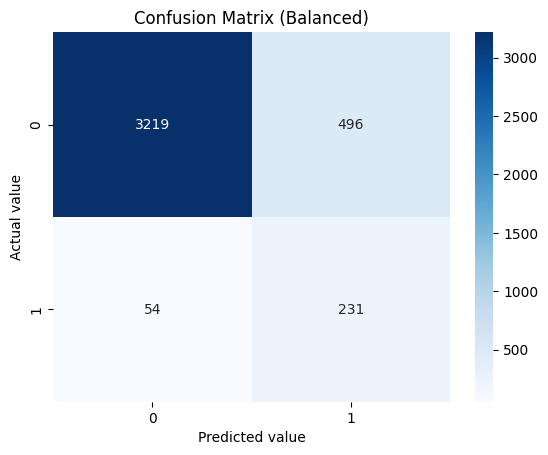

In [24]:
# Make predictions on the test set for the balanced model
y_pred_log_bal = logistic_regression_bal.predict(X_before_SMOTE_log1_test)

# Generate performance metrics for the balanced classification model
print("Classification Report (Balanced):")
print(classification_report(y_test, y_pred_log_bal))

# Calculate and display the accuracy of the balanced model
accuracy_bal = accuracy_score(y_test, y_pred_log_bal)
print(f"Model Accuracy (Balanced): {accuracy_bal:.2f}")  # Displays accuracy with 2 decimals

# Compute the confusion matrix for the balanced model
conf_matrix_bal = confusion_matrix(y_test, y_pred_log_bal)

# Visualize the confusion matrix of the balanced model
sns.heatmap(conf_matrix_bal, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Balanced)')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

**ANALISIS DEL REPORTE Y CONCLUSIONES:**

Mejora en el Recall para la Clase 1:

Con el uso de class_weight='balanced', el modelo logró una mejora significativa en el recall de la clase 1 (minoritaria), que aumentó de 0.27 a 0.81. Esto significa que ahora detecta una mayor proporción de los verdaderos positivos de esta clase.
Disminución en la Precisión para la Clase 1:

A pesar de la mejora en el recall, la precisión de la clase 1 disminuyó de 0.59 a 0.32. Esto indica que el modelo ahora clasifica incorrectamente más casos como clase 1 (falsos positivos), lo que resulta en una reducción de la precisión.
F1-Score Bajo para la Clase 1:

A pesar del aumento en el recall, el F1-Score para la clase 1 sigue siendo bajo (0.46), lo que refleja que el modelo aún no logra un equilibrio adecuado entre precisión y recall para esta clase minoritaria.
Exactitud General del Modelo (Accuracy):

La exactitud global del modelo disminuyó de 0.93 a 0.86, pero este indicador puede ser engañoso en datasets desbalanceados. La disminución sugiere que el modelo está priorizando mejorar el rendimiento en la clase 1 (minoritaria) en lugar de maximizar el número total de predicciones correctas.

Explicación en Inglés:

**REPORT ANALYSIS AND CONCLUSIONS:**

Improvement in Recall for Class 1:

Using class_weight='balanced', the model significantly improved the recall for class 1 (minority class), increasing it from 0.27 to 0.81. This means it is now identifying a much higher proportion of true positives for this class.

Decrease in Precision for Class 1:

Despite the improvement in recall, the precision for class 1 dropped from 0.59 to 0.32. This indicates the model now incorrectly classifies more cases as class 1 (false positives), leading to a reduction in precision.
Low F1-Score for Class 1:

Despite the increased recall, the F1-Score for class 1 remains relatively low (0.46), reflecting the model's struggle to balance precision and recall for the minority class.
Overall Model Accuracy:

The overall accuracy dropped from 0.93 to 0.86, but this metric can be misleading in imbalanced datasets. The drop suggests the model is prioritizing improving performance for class 1 (minority class) rather than maximizing total correct predictions.

## **4.1.4 - Logistic Regression with feature selection (based on EDA and coefficients beta of first model (original)) and BALANCED classes (SMOTE) of target variable**

In [25]:
# Split data in training and test groups

# Feature selection: month_OHE_jan: -2.895527519935959, month_OHE_mar: 2.0406913286633395, month_OHE_oct: 3.3223837103940874,
#day_norm: 0.9506486689478572, duration_robust: 1.03163477487827
X_SMOTE_log2 = X_smote[['month_OHE_jan', 'month_OHE_mar', 'month_OHE_oct', 'day_norm', 'duration_robust']]
y_SMOTE = y_smote
X_SMOTE_log2_train, X_SMOTE_log2_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE_log2, y_SMOTE, test_size=0.1, random_state=42)  # 10% for test, 90% for training

X_before_SMOTE_log2 = X_before_SMOTE [['month_OHE_jan', 'month_OHE_mar', 'month_OHE_oct', 'day_norm', 'duration_robust']]
#The same feature selection applied to X_smote is now applied to X_before_SMOTE. This will be used for test group because variables involved don´t
#have balanced classes of y (target).

# Instantiate and train the logistic regression model.
logistic_regression_SMOTE_sel = LogisticRegression()
logistic_regression_SMOTE_sel.fit(X_SMOTE_log2_train, y_SMOTE_train)

# Obtain the coefficients and the intercept
coefficients_SMOTE_log2 = logistic_regression_SMOTE_sel.coef_[0]  # .coef_ es una lista de arrays, accedemos al primero
intercept_SMOTE_log2 = logistic_regression_SMOTE_sel.intercept_[0]

# Show the results
# Get the variable names (columns of X_log)
variable_names_SMOTE_sel = X_SMOTE_log2.columns

# Print each coefficient with its corresponding variable
print("Coefficients and variables (balanced):")
for var, coef in zip(X_SMOTE_log2, coefficients_bal):
    print(f"{var}: {coef}")

# Print the intercept
print("\nIntercept:", logistic_regression_SMOTE_sel.intercept_[0])
print("\nIntercept (balanced):", intercept_SMOTE_log2)


Coefficients and variables (balanced):
month_OHE_jan: -0.3022977542920304
month_OHE_mar: -0.35308552258809084
month_OHE_oct: 0.05517099037913212
day_norm: -2.367701443303332
duration_robust: -1.6348675267979706

Intercept: -1.4870992676778572

Intercept (balanced): -1.4870992676778572


In [26]:
print("Tamaño de X_SMOTE_log2_train:", X_SMOTE_log2_train.shape)
print("Tamaño de y_SMOTE_train:", y_SMOTE_train.shape)

Tamaño de X_SMOTE_log2_train: (66787, 5)
Tamaño de y_SMOTE_train: (66787,)


## **Evaluate the Model** - Case: feature selection (based on EDA and coefficients beta of first model (original)) and BALANCED classes (SMOTE)

Classification Report (Balanced):
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      3715
           1       0.33      0.80      0.47       285

    accuracy                           0.87      4000
   macro avg       0.66      0.84      0.70      4000
weighted avg       0.94      0.87      0.89      4000

Model Accuracy (Balanced): 0.87


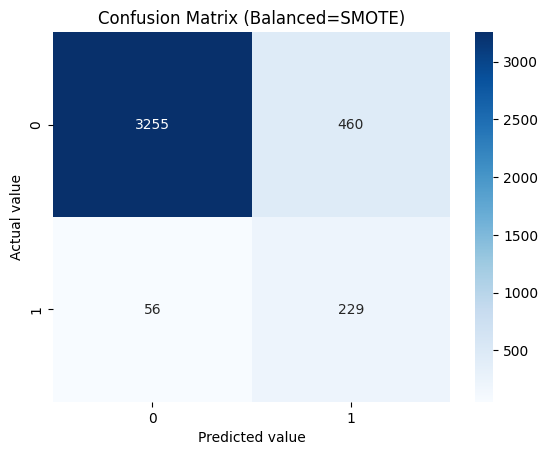

In [27]:
# Dividir la base NO BALANCEADA en conjuntos de entrenamiento y prueba para evaluación (la predicción se debe realizar sobre el grupo test
#son clases no balanceadas para no inflar las métricas de rendimiento sobre la clase minoritaria)
X_before_SMOTE_log2_train, X_before_SMOTE_log2_test, y_train, y_test = train_test_split(X_before_SMOTE_log2, y, test_size=0.1, random_state=42)

# Make predictions on the test set for the balanced model
y_pred_SMOTE_log2 = logistic_regression_SMOTE_sel.predict(X_before_SMOTE_log2_test)

# Generate performance metrics for the balanced classification model
print("Classification Report (Balanced):")
print(classification_report(y_test, y_pred_SMOTE_log2))

# Calculate and display the accuracy of the balanced model
accuracy_bal = accuracy_score(y_test, y_pred_SMOTE_log2)
print(f"Model Accuracy (Balanced): {accuracy_bal:.2f}")  # Displays accuracy with 2 decimals

# Compute the confusion matrix for the balanced model
conf_matrix_bal = confusion_matrix(y_test, y_pred_SMOTE_log2)

# Visualize the confusion matrix of the balanced model
sns.heatmap(conf_matrix_bal, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Balanced=SMOTE)')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

**Análisis del Reporte y Conclusiones:**

A través del uso de 𝑋𝑆𝑀𝑂𝑇𝐸_𝑙𝑜𝑔2, obtenida tras aplicar SMOTE a la base de datos previamente procesada (incluyendo encoding y escalado), y seleccionada mediante un análisis exploratorio de datos (EDA) y el modelo logístico original (considerando las variables con mayores coeficientes beta), NO se logró una mejora significativo en el rendimiento del modelo para la clase minoritaria (𝑦=1) ya que un un F1-Score de 0.47 indica un bajo desempeño en la predicción de la clase minoritaria (𝑦=1).


**Report Analysis and Conclusions:**

Through the use of 𝑋𝑆𝑀𝑂𝑇𝐸_𝑙𝑜𝑔2, obtained after applying SMOTE to the preprocessed dataset (including encoding and scaling) and selected through exploratory data analysis (EDA) and the original logistic model (considering the variables with the highest beta coefficients), NO significant improvement in the model's performance for the minority class (𝑦=1) was achieved. An F1-Score of 0.47 indicates poor performance in predicting the minority class (𝑦=1).









## **4.1.5 - DEFINE THE PIPELINE FOR LOGISTIC - Stratiffied K-fold Validation.**


1) Start with your original imbalanced dataset (the one without SMOTE).

2) Use StratifiedKFold to split it into folds.

3) In each fold, apply SMOTE only to the training set.
The test set remains untouched, preserving the original class distribution.

4) Train the model using the SMOTE-balanced training set, and evaluate it on the original (imbalanced) test set.

**Imports y splitter**

In [28]:
from sklearn.model_selection import StratifiedKFold, cross_validate

from imblearn.pipeline       import Pipeline          # el pipeline que acepta samplers
from imblearn.over_sampling  import SMOTE


**Choose the columns**

In [29]:
#columns that were chosen in model log2
cols = ['month_OHE_jan', 'month_OHE_mar', 'month_OHE_oct','day_norm', 'duration_robust']

X_St_Kfold_log2 = X_before_SMOTE[cols].copy()
y_St_Kfold_log2 = y.copy()                       # y es tu serie de 0/1 original

**Make HELPER to generate pipeline** it can be used with other algorithms (CART, KNN, XGBoost)

In [30]:
def make_pipeline(estimator, scale=False):
    """
    Devuelve un Pipeline con:
      - StandardScaler (opcional si scale=True)
      - SMOTE (siempre, sobre el train de cada fold)
      - El estimador que pases
    """
    steps = []
    if scale:
        steps.append(("scale", StandardScaler()))
    steps.append(("smote", SMOTE(random_state=42)))
    steps.append(("clf", estimator))
    return Pipeline(steps=steps)

In [31]:
pipe_St_KFold_log = make_pipeline(
    estimator=LogisticRegression(max_iter=500, solver="lbfgs"),
    scale=False     # porque ya escalè esas columnas
)

# **4.2 - DECISION TREES (CART) for Classification**

## **4.2.1. Classification Using the CART Algorithm with All Predictors and Imbalanced Target Variable Classes**

In [32]:
from sklearn.tree import DecisionTreeClassifier

#we create a tree object (instantiation)

DecisionTreeClassifier_original = DecisionTreeClassifier(max_depth=3, random_state=42)
# We used max_depth=3 to avoid OVERFITTING (Leaf nodes or pure divisions)

# To train the model use the training and testing sets generated in logistic regression (before balance)**:
# X_before_SMOTE_train, X_before_SMOTE_test, y_train, y_test = train_test_split(X_before_SMOTE, y, test_size=0.1, random_state=42)  # 10% for test, 90% for training

#Training the Decision Tree model
DecisionTreeClassifier_original.fit(X_before_SMOTE_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

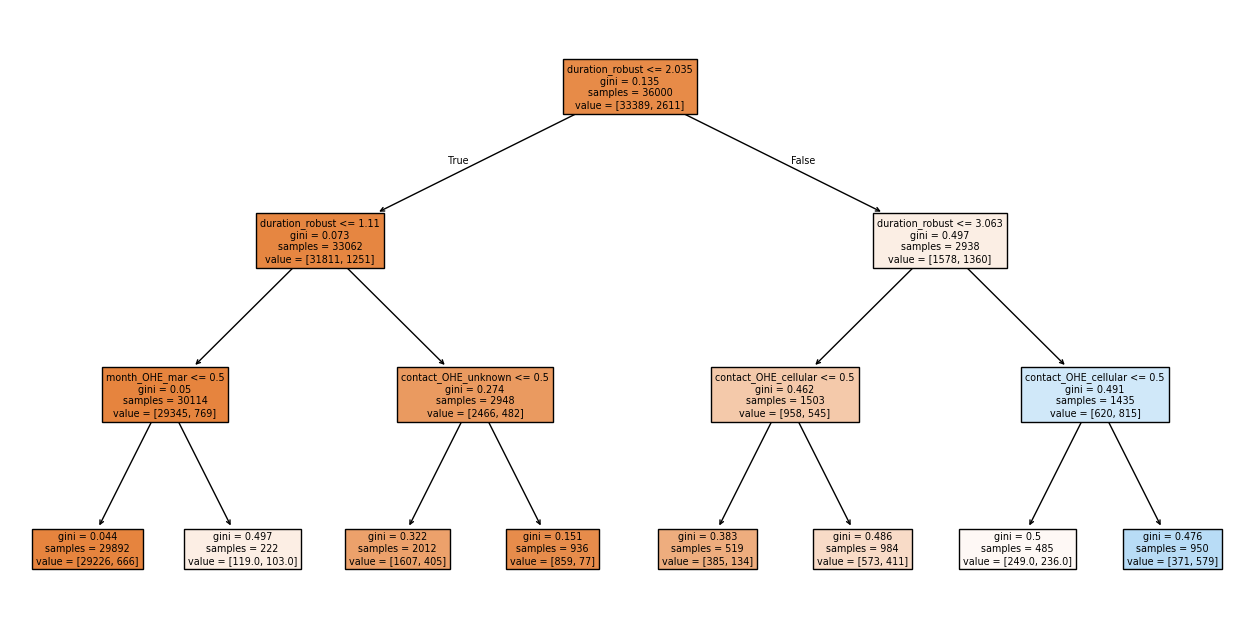

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt

# Tree visualization with original names.
plt.figure(figsize=(16, 8))
tree.plot_tree(
    DecisionTreeClassifier_original,
    feature_names=X_before_SMOTE.columns,  # Original names of the columns
    filled=True
)
plt.show()

## **Evaluate the Model with All Predictors and Imbalanced Target Variable Classes**

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3715
           1       0.61      0.21      0.31       285

    accuracy                           0.93      4000
   macro avg       0.77      0.60      0.64      4000
weighted avg       0.92      0.93      0.92      4000

Model Accuracy: 0.93


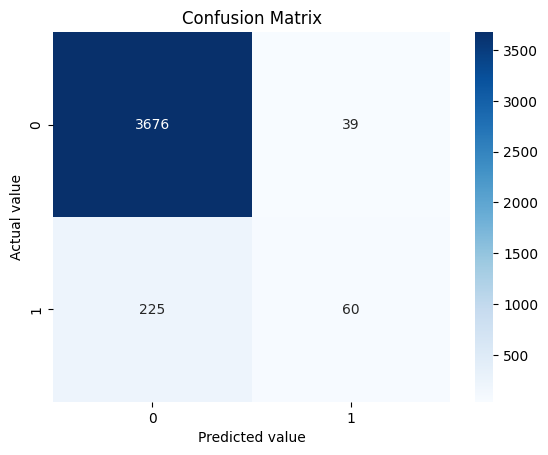

In [34]:
# Realizar predicciones en el conjunto de prueba
y_pred_DT = DecisionTreeClassifier_original.predict(X_before_SMOTE_test)

# Generar de las métricas de rendimiento del modelo de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_DT))

# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred_DT)
print(f"Model Accuracy: {accuracy:.2f}")  # Mostrará la exactitud con 2 decimales

# Calcular la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_DT)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

**ANALISIS DEL REPORTE Y CONCLUSIONES:**

ACCURACY (93%):

La exactitud global es alta, pero no refleja adecuadamente el rendimiento para la clase menos representada (clase 1) debido al desbalance de clases (3715 instancias de la clase 0 frente a solo 285 de la clase 1).
Como la clase 0 domina, el modelo puede acertar muchas predicciones solo clasificando la mayoría de las instancias como 0.

PRECISION (0.61 para clase 1):
La precisión baja para la clase 1 indica que hay muchos falsos positivos (instancias clasificadas como 1 que realmente son 0). Esto significa que el modelo tiene dificultades para identificar correctamente los casos positivos.

RECALL (0.21 para clase 1):
Un recall bajo para la clase 1 implica muchos falsos negativos (instancias clasificadas como 0 que realmente son 1). Esto es preocupante en problemas donde es crucial detectar la clase minoritaria (como en este caso).

F1-SCORE (0.31 para clase 1):
El F1-Score combina precisión y recall, y un valor de 0.31 refleja un bajo balance entre ambas métricas para la clase 1. Esto indica que el modelo no está manejando bien la clase minoritaria.
Macro Avg vs Weighted Avg:

El promedio macro (no ponderado) muestra valores más bajos (recall 0.63, F1-score 0.67), lo que confirma que el modelo no es equilibrado entre clases.
El promedio ponderado (dominado por la clase 0) presenta valores altos, pero esto no debe considerarse indicativo de un buen rendimiento general debido al desbalance de clases.

**REPORT ANALYSIS AND CONCLUSIONS:**

ACCURACY (93%):
The overall accuracy is high, but it does not adequately reflect the performance for the less-represented class (class 1) due to class imbalance (3,715 instances of class 0 versus only 285 of class 1).
Since class 0 dominates, the model can achieve many correct predictions simply by classifying most instances as 0.

PRECISION (0.61 for class 1):
The low precision for class 1 indicates a high number of false positives (instances classified as 1 that are actually 0). This means the model struggles to correctly identify positive cases.

RECALL (0.21 for class 1):
The low recall for class 1 implies a high number of false negatives (instances classified as 0 that are actually 1). This is concerning in problems where detecting the minority class is critical (as in this case).

F1-SCORE (0.31 for class 1):
The F1-score combines precision and recall, and a value of 0.31 reflects a poor balance between these metrics for class 1. This indicates that the model is not handling the minority class effectively.

## **4.2.2. Classification Using the CART Algorithm with BALANCED classes (y_smote) of target variable**

In [35]:
#we create a tree object (instantiation)

#IMPORTANTE:
# X_smote (con minúscula) se refiere a la bd con 42 features que tiene las clases balanceadas del target (y) del punto  2.Preprocessing ---> Upsamping/Downsampling,
# no confundir con _SMOTE que se uso en 4.1 (logística)
# a partir de feature selection con los mejores beta.
DecisionTreeClassifier_DT_smote = DecisionTreeClassifier(max_depth=3, random_state=42)
# We used max_depth=3 to avoid OVERFITTING (Leaf nodes or pure divisions)

X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.1, random_state=42)  # 10% for test
#Training the Decision Tree model
DecisionTreeClassifier_DT_smote.fit(X_smote_train, y_smote_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

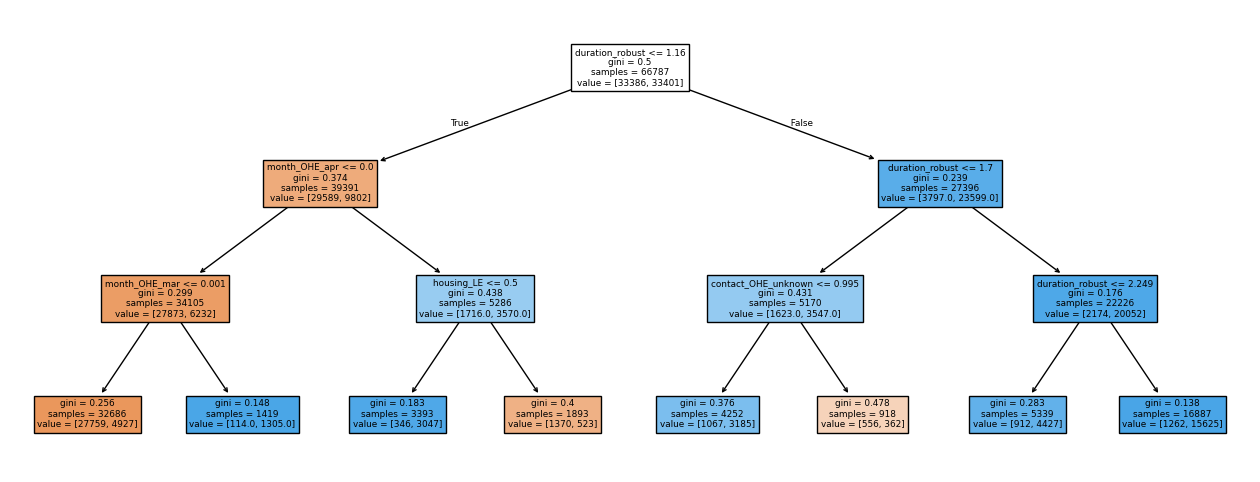

In [36]:
# Tree visualization with original names.
plt.figure(figsize=(16, 6))
tree.plot_tree(
    DecisionTreeClassifier_DT_smote,
    feature_names=X_smote.columns,  # Original names of the columns
    filled=True
)
plt.show()

## **Evaluate the Model with with BALANCED classes (y_smote) of target variable**

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.89      0.94      3715
           1       0.37      0.81      0.50       285

    accuracy                           0.89      4000
   macro avg       0.67      0.85      0.72      4000
weighted avg       0.94      0.89      0.90      4000

Model Accuracy: 0.89


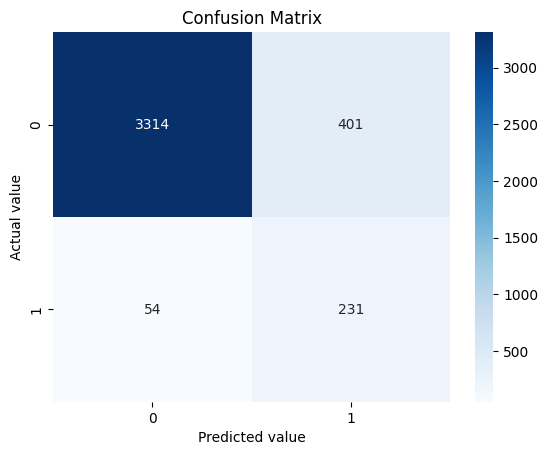

In [37]:
# Realizar predicciones en el conjunto de prueba
y_pred_DT_smote = DecisionTreeClassifier_DT_smote.predict(X_before_SMOTE_test)

# Generar de las métricas de rendimiento del modelo de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_DT_smote))

# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred_DT_smote)
print(f"Model Accuracy: {accuracy:.2f}")  # Mostrará la exactitud con 2 decimales

# Calcular la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_DT_smote)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

**ANALISIS DEL REPORTE Y CONCLUSIONES:**

Mejoras en Precisión y Recall para la Clase Minoritaria (y=1):

X_smote (con minúscula): Es la bd con 42 features que tiene las clases balanceadas del target (y) del punto  2.Preprocessing ---> Upsamping/Downsampling. Las variables de X_somte están preprocesadas a través del Encoding, scaling y SMOTE.
X_before_SMOTE is composed by the 42 preprocessed by encoding, scaling BUT NOT preprocessed by unbalanced classes (SMOTE).

A través de este modelo se incremento significativamente el Recall (de 0.31 a 0.81) pero la Precision disminuyó de 0.61 a 0.37 para la clase minoritaria respecto al modelo original (4.2.1). El modelo 4.2.2 presenta un desempeño bajo a moderado en la predicción de la clase minoritaria (𝑦=1), alcanzando un F1-Score de 0.50 que es un tanto mayor al del modelo anterior (F1-score CART 4.2.1 de 0.31), lo que indica que el balance entre precisión y recall para esta clase ha mejorado pero no lo suficiente.

**REPORT ANALYSIS AND CONCLUSIONS:**

Improvements in Precision and Recall for the Minority Class (y=1):

X_smote (with lowercase): This is the dataset with 42 features that has balanced classes for the target variable (y) from step 2. Preprocessing ---> Upsampling/Downsampling. The variables in X_smote have been preprocessed through Encoding, Scaling, and SMOTE. X_before_SMOTE is composed of the 42 features preprocessed by encoding and scaling, BUT NOT preprocessed for unbalanced classes (SMOTE).

This model significantly improved Recall (from 0.31 to 0.81), but Precision decreased from 0.61 to 0.37 for the minority class compared to the original model (4.2.1). Model 4.2.2 shows a low to moderate performance in predicting the minority class (𝑦=1), reaching an F1-Score of 0.50, which is somewhat higher than the previous model (F1-score CART 4.2.1 of 0.31). This indicates that the balance between Precision and Recall for this class has improved, but not enough.

## **4.2.3. Classification Using the CART Algorithm with BALANCED classes (y_smote) of target variable and FEATURE SELECTION considering original DT**

In [38]:
#we create a tree object (instantiation)

#IMPORTANTE:
# X_smote (con minúscula) se refiere a la bd con 42 features que tiene las clases balanceadas del target (y) del punto  2.Preprocessing ---> Upsamping/Downsampling,
# no confundir con _SMOTE que se uso en 4.1 (logística) y con _SMOTE_DT2 (la mayùscula la referimos a que es filtrada y DT2 al segundo modelo CART)
# a partir de feature selection con los mejores beta.
DecisionTreeClassifier_SMOTE_DT2 = DecisionTreeClassifier(max_depth=3, random_state=42)
# We used max_depth=4 (one level more than 4.2.2) to avoid OVERFITTING (Leaf nodes or pure divisions)

X_SMOTE_DT2 = X_smote [['duration_robust', 'month_OHE_apr', 'month_OHE_mar', 'housing_LE', 'contact_OHE_unknown']]
# X_SMOTE_DT2 is a filtered db from X_smote with the best predictors from the previous model (4.2.2): 'duration_robust', 'month_OHE_apr', 'month_OHE_mar',
#'housing_LE', 'contact_OHE_unkwnown'are the features-instances with higher IG (indice de ganancia).

X_before_SMOTE_DT2 = X_before_SMOTE [['duration_robust', 'month_OHE_apr', 'month_OHE_mar', 'housing_LE', 'contact_OHE_unknown']]
#The same feature selection applied to X_smote is now applied to X_before_SMOTE. This will be used for test group because variables involved don´t
#have balanced classes of y (target).

X_SMOTE_DT2_train, X_SMOTE_DT2_test, y_smote_train, y_smote_test = train_test_split(X_SMOTE_DT2, y_smote, test_size=0.1, random_state=42)  # 10% for test
#Training the Decision Tree model
DecisionTreeClassifier_SMOTE_DT2.fit(X_SMOTE_DT2_train, y_smote_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

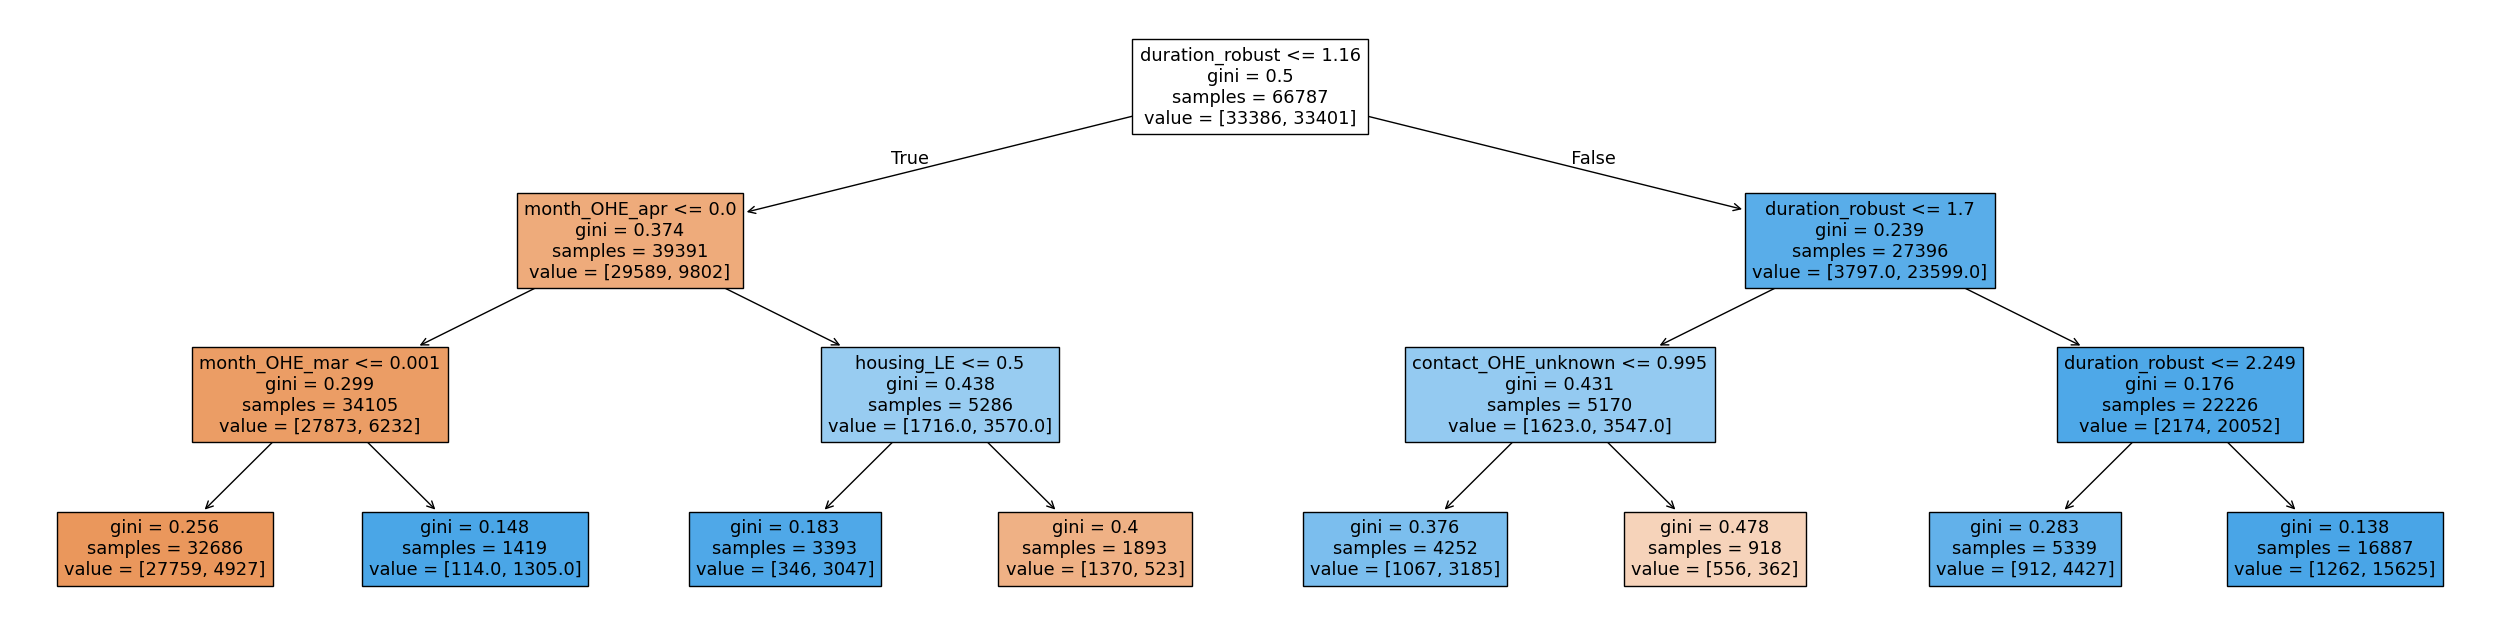

In [39]:
# Tree visualization with original names.
plt.figure(figsize=(32, 8))
tree.plot_tree(
    DecisionTreeClassifier_SMOTE_DT2,
    feature_names=X_SMOTE_DT2.columns,  # Original names of the columns
    filled=True
)
plt.show()

## **Evaluate the Model with BALANCED classes (y_smote) of target variable and FEATURE SELECTION considering original DT**

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.89      0.94      3715
           1       0.37      0.81      0.50       285

    accuracy                           0.89      4000
   macro avg       0.67      0.85      0.72      4000
weighted avg       0.94      0.89      0.90      4000

Model Accuracy: 0.89


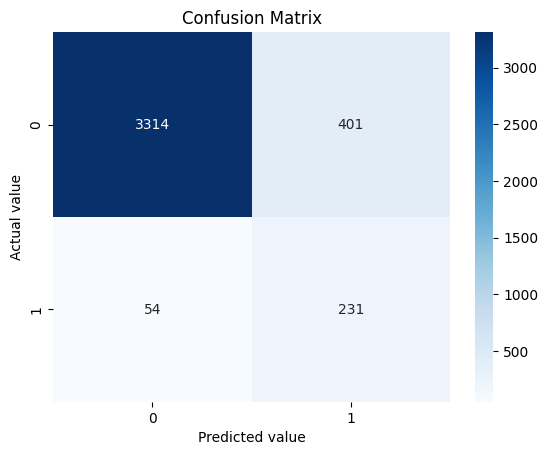

In [40]:
# Dividir la base no balanceada en conjuntos de entrenamiento y prueba para evaluación
X_before_SMOTE_DT2_train, X_before_SMOTE_DT2_test, y_train, y_test = train_test_split(X_before_SMOTE_DT2, y, test_size=0.1, random_state=42)

# Realizar predicciones en el conjunto de prueba
y_pred_DT2 = DecisionTreeClassifier_SMOTE_DT2.predict(X_before_SMOTE_DT2_test)

# Generar de las métricas de rendimiento del modelo de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_DT2))

# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred_DT2)
print(f"Model Accuracy: {accuracy:.2f}")  # Mostrará la exactitud con 2 decimales

# Calcular la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_DT2)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

**ANALISIS DEL REPORTE Y CONCLUSIONES:**

Mejoras en Precisión y Recall para la Clase Minoritaria (y=1):

X_smote (con minúscula): Es la bd con 42 features que tiene las clases balanceadas del target (y) del punto  2.Preprocessing ---> Upsamping/Downsampling. Las variables de X_somte están preprocesadas a través del Encoding, scaling y SMOTE.
X_SMOTE_DT2 is un db filtrada a partir de X_smote, donde se tomaron los mejores predictores-instancias (con el mayor IG determinado por el algoritmo CART) del modelo anterior (CART 4.2.2, SMOTE-sin feature selection). Luego, en X_before_SMOTE_DT2 se seleccionan las mismas features que se seleccionaron dentro X_smote PERO en este caso se tomaron de X_before_SMOTE. Esta última se ha utilizado  para construir el grupo TEST (a partir del SPLIT) porque la y (target) no tiene las clases balanceadas.

A través de este modelo se incremento significativamente el Recall (de 0.31 a 0.81) pero la Precision disminuyó de 0.61 a 0.37 para la clase minoritaria respecto al modelo original (4.2.1). El modelo 4.2.3 presenta un desempeño bajo a moderado en la predicción de la clase minoritaria (𝑦=1), alcanzando un F1-Score de 0.50 que es un tanto mayor al del modelo anterior (F1-score CART 4.2.1 de 0.31), lo que indica que el balance entre precisión y recall para esta clase ha mejorado pero no lo suficiente.

**ANALYSIS OF THE REPORT AND CONCLUSIONS:**

Improvements in Precision and Recall for the Minority Class (y=1):

X_smote: This is the database with 42 features where the target classes (y) have been balanced as described in section 2. Preprocessing → Upsampling/Downsampling. The variables in X_smote were preprocessed using encoding, scaling, and SMOTE.
X_SMOTE_DT2: This is a filtered version of X_smote, where the best predictors (features) were selected based on their highest Information Gain (IG) as determined by the CART algorithm in the previous model (CART 4.2.2, SMOTE without feature selection). Additionally, in X_before_SMOTE_DT2, the same features selected from X_smote were applied, but this time taken from X_before_SMOTE. The latter was used to construct the TEST group (via a train-test split) because the target variable (y) does not have balanced classes.
Using this model, the Recall significantly increased (from 0.31 to 0.81), but Precision decreased (from 0.61 to 0.37) for the minority class compared to the original model (4.2.1). The 4.2.3 model shows low-to-moderate performance in predicting the minority class (𝑦=1), achieving an F1-Score of 0.50, which is slightly higher than that of the previous model (F1-Score of 0.31 for CART 4.2.1). This indicates that the balance between precision and recall for this class has improved but remains insufficient.

## **4.2.4. DEFINICION DE PIPELINE para Decision Tree - STRATIFIED K-FOLD VALIDATION**

**Choose columns - Decision Tree**

In [41]:
#columns that were chosen in model DT2
cols_DT2 = ['duration_robust', 'month_OHE_apr', 'month_OHE_mar', 'housing_LE', 'contact_OHE_unknown']
X_St_Kfold_DT2 = X_before_SMOTE[cols_DT2].copy()
y_St_Kfold_DT2 = y.copy()                       # y es tu serie de 0/1 original

**Pipeline to Decision Tree**

In [42]:
pipe_St_KFold_DT2 = make_pipeline(
    estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
    scale=False     # porque ya escalè esas columnas
)

# **4.3 - K-NEAREST NEIGHBORS (KNN) for Classification**

## **4.3.1. Classification Using the KNN Algorithm with All Predictors and Imbalanced Target Variable Classes**

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define empty lists for the desired accuracy values
list_accuracy_train_original = []
list_accuracy_test_original = []

# Define the list of k values to explore
k_neighbors = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]

# Instantiating the KNN object and generating a loop over the different k values

for k in k_neighbors:

    knn_original = KNeighborsClassifier(n_neighbors=k)

    # Training the model
    knn_original.fit(X_before_SMOTE_train,y_train.values.ravel())
    #X_before_SMOTE is composed by the 42 preprocessed by encoding, scaling BUT NOT preprocessed by unbalanced classes (SMOTE)
    # x_smote are the 42 predictores preprocessed by encoding, scaling and SMOTE. It was obteined in 2. Preprocessing / Unsampling-Oversampling
    # Predict and evaluate on the training set

    y_train_pred_knn_original = knn_original.predict(X_before_SMOTE_train)
    train_acc_original = accuracy_score(y_train, y_train_pred_knn_original)

    # Predict and evaluate on the evaluation set
    y_test_pred_knn_original = knn_original.predict(X_before_SMOTE_test)
    test_acc_original = accuracy_score(y_test, y_test_pred_knn_original)

    # Add the information to the lists
    list_accuracy_train_original.append(train_acc_original)
    list_accuracy_test_original.append(test_acc_original)

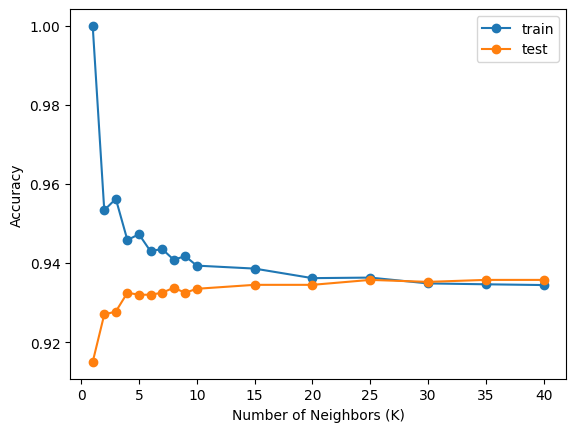

In [44]:
import matplotlib.pyplot as plt
#X_train accuracy and X_test accuracy plots
plt.plot(k_neighbors, list_accuracy_train_original, 'o-', label='train')
plt.plot(k_neighbors, list_accuracy_test_original, 'o-', label='test')
plt.xlabel('Number of Neighbors (K)')  # Axis X name
plt.ylabel('Accuracy')  # Axis y name
plt.legend()
plt.show()

**SWEET SPOT** corresponds from K=5 to K=10, when train and test group´s curves approach each other.

In [45]:
# KNN object k=5
knn_original_k5=KNeighborsClassifier(n_neighbors=5)

knn_original_k5.fit(X_before_SMOTE_train,y_train.values.ravel())

# KNN object k=10
knn_original_k10=KNeighborsClassifier(n_neighbors=10)

knn_original_k10.fit(X_before_SMOTE_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=10)

## **Evaluate the Model with All Predictors (with encoding and scaling preproccesing) and Imbalanced Target Variable Classes (not applied SMOTE). Two cases: k=5 and k=10**

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3715
           1       0.54      0.31      0.39       285

    accuracy                           0.93      4000
   macro avg       0.74      0.64      0.68      4000
weighted avg       0.92      0.93      0.92      4000

Model Accuracy: 0.93


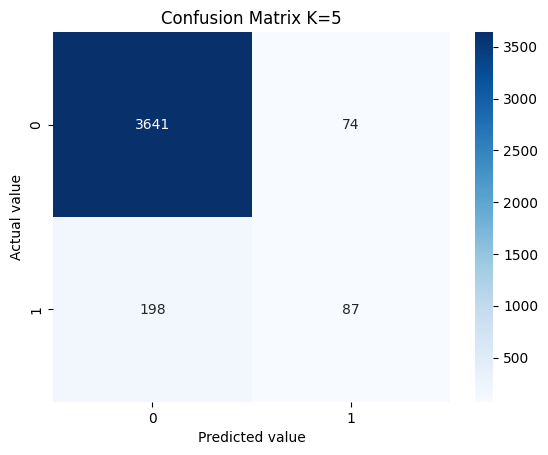

In [46]:
# Realizar predicciones en el conjunto de prueba con K=5

y_pred_knn_original_k5 = knn_original_k5.predict(X_before_SMOTE_test)

# Generar de las métricas de rendimiento del modelo de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_knn_original_k5))

# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred_knn_original_k5)
print(f"Model Accuracy: {accuracy:.2f}")  # Mostrará la exactitud con 2 decimales

# Calcular la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_knn_original_k5)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix K=5')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3715
           1       0.60      0.20      0.30       285

    accuracy                           0.93      4000
   macro avg       0.77      0.59      0.63      4000
weighted avg       0.92      0.93      0.92      4000

Model Accuracy: 0.93


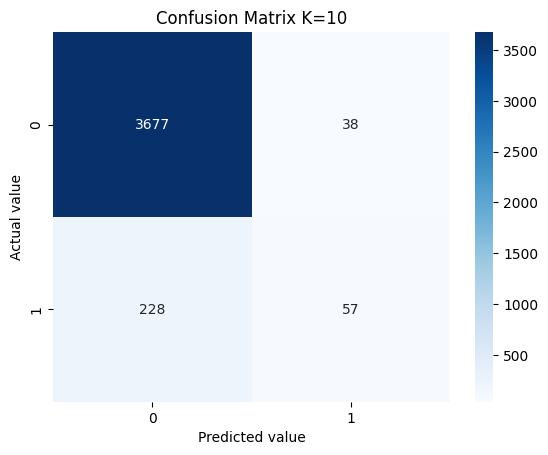

In [47]:
# Realizar predicciones en el conjunto de prueba con K=10

y_pred_knn_original_k10 = knn_original_k10.predict(X_before_SMOTE_test)

# Generar de las métricas de rendimiento del modelo de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_knn_original_k10))

# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred_knn_original_k10)
print(f"Model Accuracy: {accuracy:.2f}")  # Mostrará la exactitud con 2 decimales

# Calcular la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_knn_original_k10)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix K=10')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

**ANALISIS DEL REPORTE Y CONCLUSIONES (K=5 y K=10):**

ACCURACY (93%):

La exactitud global es alta, pero no refleja adecuadamente el rendimiento para la clase menos representada (clase 1) debido al desbalance de clases (3715 instancias de la clase 0 frente a solo 285 de la clase 1).
Como la clase 0 domina, el modelo puede acertar muchas predicciones solo clasificando la mayoría de las instancias como 0.

PRECISION (0.54 con K=5 y 0.60 con K=10 para clase 1):
La precisión baja para la clase 1 con ambos K, indica que hay muchos falsos positivos (instancias clasificadas como 1 que realmente son 0). Esto significa que el modelo tiene dificultades para identificar correctamente los casos positivos.

RECALL (0.31 con K=5 y 0.20 con K=10, para clase 1):
Un recall bajo para la clase 1 implica muchos falsos negativos (instancias clasificadas como 0 que realmente son 1). Esto es preocupante en problemas donde es crucial detectar la clase minoritaria (como en este caso).

F1-SCORE (0.39 K=5 y 0.30 con K=10, para clase 1):
El F1-Score combina precisión y recall, y un valor de 0.39 y 0,30 refleja un bajo balance entre ambas métricas para la clase 1, para los casos K=5 y K=10 respectivamente. Esto indica que el modelo no está manejando bien la clase minoritaria.

Macro Avg vs Weighted Avg:

El promedio macro (no ponderado) muestra valores más bajos (recall 0.63, F1-score 0.67), lo que confirma que el modelo no es equilibrado entre clases.
El promedio ponderado (dominado por la clase 0) presenta valores altos, pero esto no debe considerarse indicativo de un buen rendimiento general debido al desbalance de clases.


**REPORT ANALYSIS AND CONCLUSIONS (K=5 and K=10):**

ACCURACY (93%):

The overall accuracy is high but does not adequately reflect the performance for the less represented class (class 1) due to class imbalance (3715 instances of class 0 versus only 285 of class 1).
Since class 0 dominates, the model can achieve high accuracy by simply classifying most instances as 0.

PRECISION (0.54 with K=5 and 0.60 with K=10 for class 1):
The low precision for class 1 in both cases indicates a high number of false positives (instances classified as 1 that are actually 0). This suggests the model struggles to correctly identify positive cases.

RECALL (0.31 with K=5 and 0.20 with K=10 for class 1):
Low recall for class 1 implies a high number of false negatives (instances classified as 0 that are actually 1). This is concerning in problems where detecting the minority class is critical (as in this case).

F1-SCORE (0.39 with K=5 and 0.30 with K=10 for class 1):
The F1-Score combines precision and recall, with values of 0.39 and 0.30 reflecting a poor balance between these metrics for class 1 in the K=5 and K=10 scenarios, respectively. This indicates the model is not handling the minority class well.

Macro Avg vs Weighted Avg:

The macro average (unweighted) shows lower values (recall 0.63, F1-score 0.67), confirming that the model is not balanced across classes.
The weighted average (dominated by class 0) shows higher values, but this should not be considered indicative of overall good performance due to class imbalance.

## **4.3.2. Classification Using the KNN Algorithm for classification with BALANCED classes (y_smote) of target variable**

In [48]:
#IMPORTANTE:
# X_smote (con minúscula) se refiere a la bd con 42 features que tiene las clases balanceadas del target (y) del punto  2.Preprocessing ---> Upsamping/Downsampling,
# Por ejemplo en Decision Trees (4.2.2) se usó X_smote_train, X_smote_test, y_smote_train, y_smote_test // X_smote, y_smote (no hay que hacer split aquí)
# No confundir con _SMOTE que se uso en 4.1.4 (logística, con X_SMOTE_log2) a partir de feature selection tomando los mejores BETAS de la regress. logística original
# y 4.2.3 (Decision Tree, con X_SMOTE_DT2) a partir de feature selection con los mejores beta y mejores predictores-instancias
# (mayores IG, determinados por CART).

# Define empty lists for the desired accuracy values
list_accuracy_train_KNN2_smote = []
list_accuracy_test_KNN2_before_SMOTE = []

# Define the list of k values to explore
k_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40]

# Instantiating the KNN object and generating a loop over the different k values
for k in k_neighbors:
    # Instantiate the KNN classifier with k neighbors
    kNeighbors_KNN2 = KNeighborsClassifier(n_neighbors=k)

    # Training the model on the SMOTE-balanced training set
    kNeighbors_KNN2.fit(X_smote_train, y_smote_train.values.ravel())

    # Predict and calculate accuracy on the SMOTE-balanced training set
    y_train_pred_KNN2_smote = kNeighbors_KNN2.predict(X_smote_train)
    train_acc_KNN2_smote = accuracy_score(y_smote_train, y_train_pred_KNN2_smote)

    # Predict and calculate accuracy on the original unbalanced test set
    y_test_pred_KNN2_before_SMOTE = kNeighbors_KNN2.predict(X_before_SMOTE_test)
    test_acc_KNN2_before_SMOTE = accuracy_score(y_test, y_test_pred_KNN2_before_SMOTE)

    # Append the results to the respective lists
    list_accuracy_train_KNN2_smote.append(train_acc_KNN2_smote)
    list_accuracy_test_KNN2_before_SMOTE.append(test_acc_KNN2_before_SMOTE)

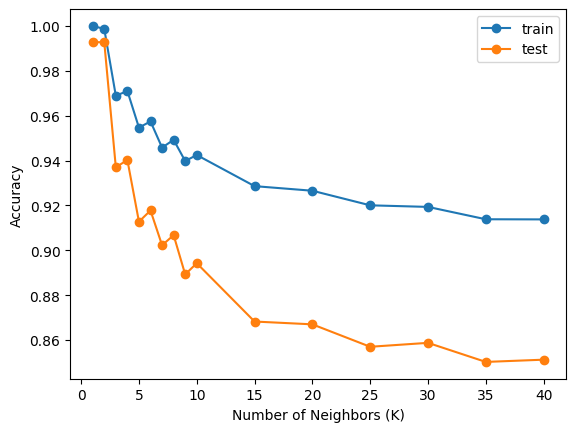

In [49]:
#X_smote_train accuracy and X_smote_test accuracy plots
plt.plot(k_neighbors, list_accuracy_train_KNN2_smote, 'o-', label='train')
plt.plot(k_neighbors, list_accuracy_test_KNN2_before_SMOTE, 'o-', label='test')
plt.xlabel('Number of Neighbors (K)')  # Axis X name
plt.ylabel('Accuracy')  # Axis y name
plt.legend()
plt.show()

**SWEET SPOT** corresponds to K=3, when train and test group´s curves approach each other.

In [50]:
#SWEET SPOT corresponds with aproximation to K=3, when train and test group´s curves approach each other.

# KNN object k=3
kNeighbors_KNN2_k3=KNeighborsClassifier(n_neighbors=3)

kNeighbors_KNN2_k3.fit(X_smote_train,y_smote_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

## **Evaluate the Model (K=3) with with BALANCED classes (y_smote) of target variable.**

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      3715
           1       0.53      1.00      0.69       285

    accuracy                           0.94      4000
   macro avg       0.77      0.96      0.83      4000
weighted avg       0.97      0.94      0.95      4000

Model Accuracy: 0.94


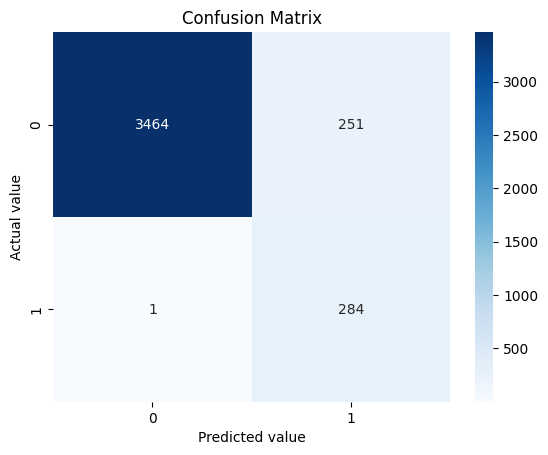

In [51]:
# Predictions over the test group. Realizar predicciones en el conjunto de prueba
y_pred_KNN2_k3 = kNeighbors_KNN2_k3.predict(X_before_SMOTE_test)

# Generar de las métricas de rendimiento del modelo de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_KNN2_k3))

# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred_KNN2_k3)
print(f"Model Accuracy: {accuracy:.2f}")  # Mostrará la exactitud con 2 decimales

# Calcular la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_KNN2_k3)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

**ANALISIS DEL REPORTE Y CONCLUSIONES:**

Mejoras en Precisión y Recall para la Clase Minoritaria (y=1):

X_smote (con minúscula): Es la bd con 42 features que tiene las clases balanceadas del target (y) del punto  2.Preprocessing ---> Upsamping/Downsampling. Las variables de X_smote están preprocesadas a través del Encoding, scaling y SMOTE.

A través del uso de X_smote (clases balanceadas) para entrenar el modelo, se logró un incremento significativo en el Recall y la Precision disminuyó levemente para la clase minoritaria respecto al modelo anterior (4.3.1 con k=5, sin clases balanceadas). La Precision para la clase éxito (1) pasó de 0.54 a 0.53 y el Recall de 0.31 a 1.0.

El modelo ahora presenta un desempeño moderado a bueno en la predicción de la clase minoritaria (𝑦=1), alcanzando un F1-Score de 0.69, lo que indica un balance aceptable entre precisión y recall para esta clase.

**El modelo (kNeighbors_KNN2_smote_k3, con K=3), aplicado a la base de datos X_smote (preprocesada mediante encoding, scaling y SMOTE), demuestra un desempeño moderado a bueno en la predicción de la clase minoritaria (𝑦=1). Mantiene una alta capacidad predictiva global, que no representa una alta capacidad predictiva para la clase minoritaria.**

**REPORT ANALYSIS AND CONCLUSIONS:**

Improvements in Precision and Recall for the Minority Class (y=1):

X_smote (lowercase): Refers to the dataset with 42 features, where the target classes (y) have been balanced through the process outlined in 2. Preprocessing ---> Upsampling/Downsampling. The variables in X_smote were preprocessed using encoding, scaling, and SMOTE.

By using X_smote (balanced classes) to train the model, there was a significant increase in Recall for the minority class, while Precision slightly decreased compared to the previous model (4.3.1 with k=5, without balanced classes). Precision for the success class (1) decreased from 0.54 to 0.53, while Recall increased from 0.31 to 1.0.

The model now demonstrates moderate to good performance in predicting the minority class (𝑦=1), achieving an F1-Score of 0.69. This indicates an acceptable balance between Precision and Recall for this class.

The model (kNeighbors_KNN2_smote_k3, with K=3), applied to the X_smote dataset (preprocessed with encoding, scaling, and SMOTE), shows moderate to good performance in predicting the minority class (𝑦=1). However, it maintains a high overall predictive capacity, which does not necessarily translate into strong predictive performance for the minority class.

## **4.3.3. KNN Pipeline to use in STRATIFIED K-FOLD VALIDATION**
**DEFINICION DE PIPELINE PARA KNN, STRATIFIED K-FOLD VALIDATION**

In [52]:
#columns that were chosen in model DT2
X_St_Kfold_KNN2 = X_before_SMOTE.copy()
y_St_Kfold_KNN2 = y.copy()                       # y es tu serie de 0/1 original

In [53]:
pipe_St_KFold_KNN2 = make_pipeline(
    estimator=KNeighborsClassifier(n_neighbors=3),
    scale=False     # porque ya escalè esas columnas
)

# **4.4 - Extreme Gradient Boosting (XGB)**

## **4.4.1. Classification Using the XGBoost Algorithm with All Predictors and Imbalanced Target Variable Classes**

**PARAMETROS XGBOOST**

**n_estimators:** Este parámetro especifica el número de árboles de decisión que se utilizarán en el modelo.

**learning_rate:** Controla el tamaño de cada paso que se da en la dirección de la reducción del error. Un learning rate más bajo significa que el modelo toma pasos más pequeños y, por lo tanto, puede requerir más estimadores (n_estimators) para lograr un buen ajuste.

**max_depth:** Este parámetro limita la profundidad máxima de cada árbol de decisión. Árboles más profundos pueden aprender patrones complejos pero también pueden ser más propensos al sobreajuste.

**random_state:** Establece una semilla para el generador de números aleatorios, lo que permite que los resultados sean reproducibles. Usar el mismo random_state asegura que los mismos datos de entrenamiento y prueba se generen en cada ejecución.

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Crear y ajustar el modelo
XGBoost_original = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# To train the model use the training and testing sets generated in logistic regression (before balance)**:
# X_before_SMOTE_train, X_before_SMOTE_test, y_train, y_test = train_test_split(X_before_SMOTE, y, test_size=0.1, random_state=42)  # 10% for test, 90% for training

#Training the XGBoost model
XGBoost_original.fit(X_before_SMOTE_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

## **Evaluate the XGBoost Model with All Predictors and Imbalanced Target Variable Classes**

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3715
           1       0.63      0.36      0.46       285

    accuracy                           0.94      4000
   macro avg       0.79      0.67      0.71      4000
weighted avg       0.93      0.94      0.93      4000

Model Accuracy: 0.94


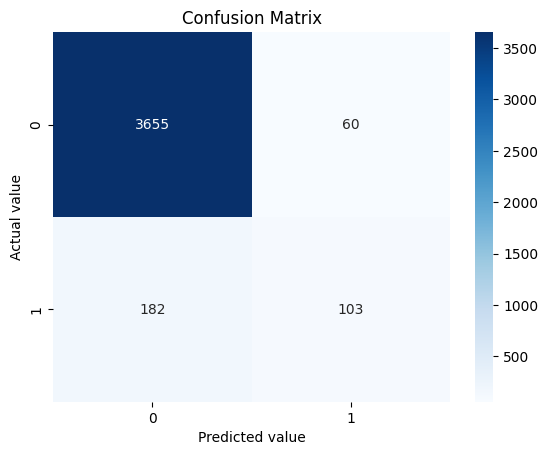

In [55]:
# Realizar predicciones en el conjunto de prueba
y_pred_XGBoost_orig = XGBoost_original.predict(X_before_SMOTE_test)

# Generar de las métricas de rendimiento del modelo de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_XGBoost_orig))

# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred_XGBoost_orig)
print(f"Model Accuracy: {accuracy:.2f}")  # Mostrará la exactitud con 2 decimales

# Calcular la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_XGBoost_orig)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

## **4.4.2. Classification Using XGBoost Algorithm for classification with BALANCED classes (y_smote) of target variable**

In [56]:
# Crear y ajustar el modelo
XGBoost_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#IMPORTANTE (viene de 4.1, 4.2 y 4.3):
# X_smote (con minúscula) se refiere a la bd con 42 features que tiene las clases balanceadas del target (y) del punto  2.Preprocessing ---> Upsamping/Downsampling,
# X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.1, random_state=42)  # 10% for test

#Training the XGBoost model
XGBoost_2.fit(X_smote_train, y_smote_train)


GradientBoostingClassifier(random_state=42)

## **Evaluate the XGBoost Model with BALANCED classes (y_smote) of target variable**

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3715
           1       0.40      0.82      0.54       285

    accuracy                           0.90      4000
   macro avg       0.69      0.86      0.74      4000
weighted avg       0.94      0.90      0.91      4000

Model Accuracy: 0.90


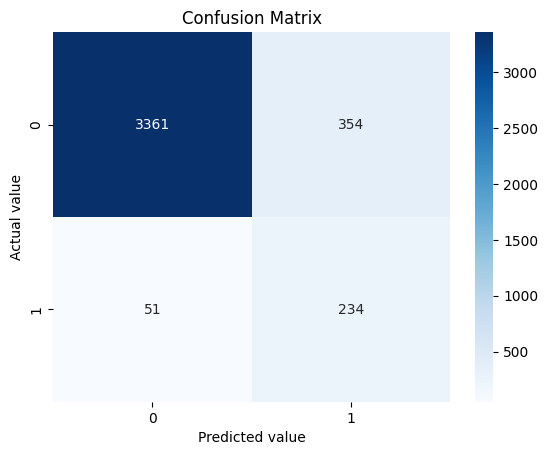

In [57]:
# Realizar predicciones en el conjunto de prueba
y_pred_XGBoost_2 = XGBoost_2.predict(X_before_SMOTE_test)

# Generar de las métricas de rendimiento del modelo de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_XGBoost_2))

# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred_XGBoost_2)
print(f"Model Accuracy: {accuracy:.2f}")  # Mostrará la exactitud con 2 decimales

# Calcular la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_XGBoost_2)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

## **4.3.2.1 XGB PIPELINE to use in STRATIFIED K-FOLD VALIDATION**

In [64]:
#columns that were chosen in model XGB2
X_St_Kfold_XGB2 = X_before_SMOTE.copy()
y_St_Kfold_XGB2 = y.copy()                       # y es tu serie de 0/1 original

In [65]:
pipe_St_KFold_XGB2 = make_pipeline(
    estimator=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    scale=False     # porque ya escalè esas columnas
)

## **4.4.3. Classification Using XGBoost Algorithm for classification with BALANCED classes (y_smote) of target variable with optimization of hyperparameters**

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Definir el modelo base
XGBoost_optimizado = GradientBoostingClassifier(random_state=42)

# Definir la grilla de hiperparámetros
param_dist = {
    'n_estimators': randint(50, 300),  # Número de árboles
    'learning_rate': uniform(0.01, 0.3),  # Tasa de aprendizaje
    'max_depth': randint(2, 10),  # Profundidad máxima de los árboles
    'min_samples_split': randint(2, 10),  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': randint(1, 10),  # Mínimo de muestras en hojas
    'subsample': uniform(0.5, 0.5),  # Fracción de datos usados por cada árbol
}

# Definir la búsqueda de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(
    XGBoost_optimizado,
    param_distributions=param_dist,
    n_iter=30,  # Número de combinaciones a probar
    scoring='f1',  # Optimizar el F1-Score de la clase minoritaria
    cv=5,  # Validación cruzada
    verbose=2,
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42
)

# Entrenar la búsqueda
random_search.fit(X_smote_train, y_smote_train)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


**Evaluate the XGBoost Model with BALANCED classes (y_smote) of target variable and HYPERPARAMETERS OPTIMIZATION**

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3715
           1       0.94      0.94      0.94       285

    accuracy                           0.99      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.99      0.99      0.99      4000

Model Accuracy: 0.99


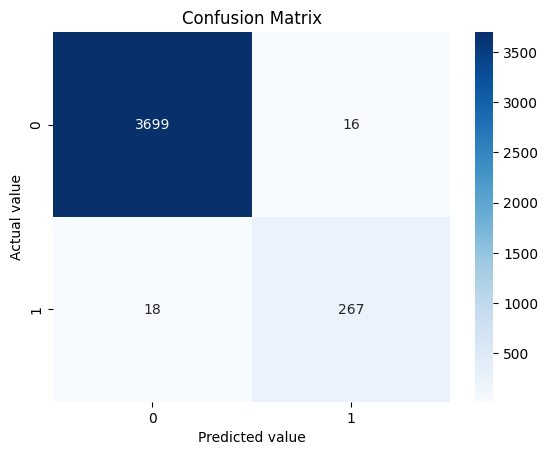

In [59]:
# Realizar predicciones en el conjunto de prueba
y_pred_XGBoost_best_mod = best_model.predict(X_before_SMOTE_test)

# Generar de las métricas de rendimiento del modelo de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_XGBoost_best_mod))

# Calcular y mostrar la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred_XGBoost_best_mod)
print(f"Model Accuracy: {accuracy:.2f}")  # Mostrará la exactitud con 2 decimales

# Calcular la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_XGBoost_best_mod)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.show()

**ANALISIS DEL REPORTE Y CONCLUSIONES:**

A través de la optimización de hiperparámetros del XGBoost para entrenar el modelo sobre la bd llamada X_smote (clases balanceadas) , se logró un incremento significativo en el Recall y la Precision para la clase minoritaria respecto a los modelos anteriores (4.4.1 y 4.4.2).
El modelo ahora presenta un desempeño excelente en la predicción de la clase minoritaria (𝑦=1), alcanzando un F1-Score de 0.95, lo que indica un balance más que aceptable entre precisión y recall para esta clase.

**REPORT ANALYSIS**

Through hyperparameter optimization of XGBoost trained on the X_smote dataset (balanced classes), a significant improvement in Recall and Precision for the minority class was achieved compared to previous models (4.4.1 and 4.4.2).
The model now demonstrates excellent performance in predicting the minority class (𝑦=1), achieving an F1-Score of 0.95, which indicates a more than acceptable balance between Precision and Recall for this class.

# MODEL SELECTION WITH STRATIFIED K-FOLD VALIDATION
ELECCION DEL MODELO CON STRATIFIED K-FOLD VALIDATION

(se toman los pipelines construidos para cada algoritmo en 4.1.5 (logistica), 4.2.4 (Decision Tree), 4.3.3 (KNN)

## **DICTIONARY to get metrics for each algorithm in STRATIFIED K-FOLD VALIDATION**
Se construye un diccionario para no tener que hallar los errores de cada uno de los modelos-algoritmos a través de Stratified Cross Validation por separado

In [67]:
models = {
    "logistica": {
        "pipe": pipe_St_KFold_log,
        "X": X_St_Kfold_log2,
        "y": y_St_Kfold_log2
    },
    "DecisionTree": {
        "pipe": pipe_St_KFold_DT2,
        "X": X_St_Kfold_DT2,
        "y": y_St_Kfold_DT2
    },
    "kNN": {
        "pipe": pipe_St_KFold_KNN2,
        "X": X_St_Kfold_KNN2,
        "y": y_St_Kfold_KNN2
    },
    "XGB": {
        "pipe": pipe_St_KFold_XGB2,
        "X": X_St_Kfold_XGB2,
        "y": y_St_Kfold_XGB2
    }
}

## **Validate with Stratified K-Fold and get metrics**.
## **Validar con Stratified K-Fold y recolectar métricas**

In [68]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Validador estratificado (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Métricas que querés comparar
scoring = ["precision", "recall", "f1", "roc_auc"]

results = {}

for name, obj in models.items():
    pipe = obj["pipe"]
    X    = obj["X"]
    y    = obj["y"]

    scores = cross_validate(
        pipe, X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,               # paraleliza folds
        return_train_score=False
    )

    # Guardá media ± desvío de cada métrica
    results[name] = {
        m: (scores[f"test_{m}"].mean(), scores[f"test_{m}"].std())
        for m in scoring
    }

## **COMPARATIVE RESULTS - Stratified k-fold validation with precision/recall/f1 per algorithm**
**RESULTADOS COMPARATIVOS**
**por defecto cross_validate con “precision/recall/f1” devuelve sólo clase 1 (positiva y minoritaria)**

In [69]:
print("=== Resultados de validación cruzada (media ± desvío estándar) ===\n")

for model_name, metrics in results.items():
    print(f"{model_name.upper()}")
    for metric_name, (mean_score, std_score) in metrics.items():
        print(f"  {metric_name:<10s}: {mean_score:.3f} ± {std_score:.3f}")
    print()
# por defecto cross_validate con “precision/recall/f1” devuelve sólo clase 1 (positiva y minoritaria)

=== Resultados de validación cruzada (media ± desvío estándar) ===

LOGISTICA
  precision : 0.316 ± 0.010
  recall    : 0.768 ± 0.012
  f1        : 0.448 ± 0.011
  roc_auc   : 0.889 ± 0.004

DECISIONTREE
  precision : 0.311 ± 0.017
  recall    : 0.814 ± 0.016
  f1        : 0.450 ± 0.018
  roc_auc   : 0.867 ± 0.008

KNN
  precision : 0.351 ± 0.006
  recall    : 0.666 ± 0.005
  f1        : 0.460 ± 0.004
  roc_auc   : 0.834 ± 0.005

XGB
  precision : 0.403 ± 0.005
  recall    : 0.798 ± 0.015
  f1        : 0.535 ± 0.006
  roc_auc   : 0.939 ± 0.004

